In [1]:
# Baseline results:


# FB237 - ComplEx
# TEST :  ({'rhs': 0.43725693225860596, 'lhs': 0.24350158870220184}, {'rhs': tensor([0.3430, 0.4798, 0.6232]), 'lhs': tensor([0.1607, 0.2649, 0.4099])})
#
#
# FB237 - ComplEx_NNE
# TEST :  ({'rhs': 0.4425685703754425, 'lhs': 0.2489389330148697}, {'rhs': tensor([0.3447, 0.4868, 0.6340]), 'lhs': tensor([0.1619, 0.2741, 0.4254])})
# mu=100
# parameter settings: Namespace(batch_size=1000, dataset='FB237', decay1=0.9, decay2=0.999, init=0.001, learning_rate=0.1, max_epochs=100, model='ComplEx_NNE', optimizer='Adagrad', rank=500, reg=0.01, regularizer='N3', valid=5.0)
#
#
#
# May 10 - TEST :  ({'rhs': 0.4451044201850891, 'lhs': 0.24951453506946564}, {'rhs': tensor([0.3483, 0.4881, 0.6378]), 'lhs': tensor([0.1628, 0.2727, 0.4277])})








#
#
#TEST :  ({'rhs': 0.4440726935863495, 'lhs': 0.250210702419281}, {'rhs': tensor([0.3471, 0.4878, 0.6369]), 'lhs': tensor([0.1639, 0.2743, 0.4269])})
#
#TEST :  ({'rhs': 0.4438616931438446, 'lhs': 0.25086915493011475}, {'rhs': tensor([0.3466, 0.4883, 0.6363]), 'lhs': tensor([0.1631, 0.2757, 0.4283])})

# Initial run

In [57]:
import pickle
with open('model_data.pkl', 'rb') as handle:
    m = pickle.load(handle)

In [58]:
dir(m.embeddings)
# print(m.embeddings[0].weight)
# with torch.no_grad():
#     for param in m.parameters():
#         print((param))
#         param.clamp_(1e-3, 1)
#         print(param)
#         break
# m.parameters()[0]
all_idx = [i for i in range(m.embeddings[0].num_embeddings)]
all_idx = torch.LongTensor(all_idx).cuda()
tmp = m.embeddings[0](all_idx)
# m.embeddings[0].weight.data = m.embeddings[0].weight.data.clamp_(0.01, 1)
# m.embeddings[0].num_embeddings 
m.embeddings[0].weight.data[[0, 1]]

tensor([[ 0.4135, -0.2375,  0.1665,  ..., -0.3173, -0.1253, -0.3187],
        [-0.0872,  0.1159,  0.2083,  ..., -0.4141, -0.2557, -0.0050]],
       device='cuda:0')

In [3]:
%run kbc/learn.py --dataset FB237 --model ComplEx --rank 500 --optimizer Adagrad --learning_rate 1e-1 --batch_size 1000 --regularizer N3 --reg 1e-2 --max_epochs 1 --valid 5


======> Parameter settings: Namespace(batch_size=1000, dataset='FB237', decay1=0.9, decay2=0.999, init=0.001, learning_rate=0.1, max_epochs=1, model='ComplEx', optimizer='Adagrad', rank=500, reg=0.01, regularizer='N3', valid=5.0)
original training number: 272115
sample training number: 272115

======> Number of relations: 237
(14541, 474, 14541)


train loss:   0%|          | 0/272115 [00:00<?, ?ex/s]

======> Checking model type


train loss:   2%|▏         | 6000/272115 [00:04<03:11, 1392.69ex/s, loss=27]


KeyboardInterrupt: 

In [20]:
conda list

# packages in environment at /opt/conda:
#
# Name                    Version                   Build  Channel
_libgcc_mutex             0.1                        main  
anyio                     2.2.0            py37h89c1867_0    conda-forge
argon2-cffi               20.1.0           py37h4abf009_2    conda-forge
asn1crypto                1.3.0                    py37_0  
async_generator           1.10                       py_0    conda-forge
attrs                     21.2.0             pyhd8ed1ab_0    conda-forge
babel                     2.9.1              pyh44b312d_0    conda-forge
backcall                  0.1.0                    py37_0  
beautifulsoup4            4.9.0                    py37_0  
blas                      1.0                         mkl  
bleach                    3.3.0              pyh44b312d_0    conda-forge
bzip2                     1.0.8                h7b6447c_0  
ca-certificates           2020.12.5            ha878542_0    conda-forge
certifi            

# model parameters

In [21]:
m.rank , m.sizes

(500, (14951, 2690, 14951))

In [6]:
emb = m.embeddings

In [8]:
emb[0]

Embedding(14951, 1000, sparse=True)

In [9]:
emb[1]

Embedding(2690, 1000, sparse=True)

In [10]:
from kbc.datasets import Dataset

dataset = Dataset("FB15K")
examples = torch.from_numpy(dataset.get_train().astype('int64'))

In [60]:
np.ceil(examples.shape[0]/ 1000)

967.0

In [31]:
examples.shape

actual_examples = examples[0:10, :]
input_batch = actual_examples.cuda()

In [32]:
predictions, factors = m.forward(input_batch)

In [52]:
predictions.shape , len(factors)

(torch.Size([10, 14951]), 3)

In [53]:
factors[0].shape , factors[1].shape , factors[2].shape

(torch.Size([10, 500]), torch.Size([10, 500]), torch.Size([10, 500]))

In [54]:
predictions[0]

tensor([-3.0956, -1.7274, -3.8236,  ..., -1.7622, -2.6644, -2.7726],
       device='cuda:0', grad_fn=<SelectBackward>)

In [55]:
truth = input_batch[:, 2]

In [56]:
truth

tensor([14087, 14423, 12452, 11884,  9212,  4125, 10917,  6416,  9625,  8263],
       device='cuda:0')

In [16]:
import numpy as np
copy = np.copy(dataset.data['train'])

#tmp = np.copy(copy[:, 0])
#copy[:, 0] = copy[:, 2]
#copy[:, 2] = tmp
#copy[:, 1] += self.n_predicates // 2  # has been multiplied by two.

In [17]:
copy

array([[ 8198,  1114, 14087],
       [13163,   306, 14423],
       [  108,  1175, 12452],
       ...,
       [12920,     3,  4309],
       [ 4140,    37, 12866],
       [11227,  1181, 11416]], dtype=uint64)

In [28]:
!wc -l "kbc/src_data/FB15K/train"

483142 kbc/src_data/FB15K/train


In [23]:
for f in ['train', 'test', 'valid']:
            print(str(dataset.root / (f + '.pickle')))
            #self.data[f] = pickle.load(in_file)

/home/ComplEx-Inject/kbc/data/FB15K/train.pickle
/home/ComplEx-Inject/kbc/data/FB15K/test.pickle
/home/ComplEx-Inject/kbc/data/FB15K/valid.pickle


In [67]:
type(m.embeddings[0].weight.data)

torch.Tensor

# Test

In [69]:
%run kbc/learn.py --dataset FB15K --model ComplEx --rank 500 --optimizer Adagrad --learning_rate 1e-1 --batch_size 1000 --regularizer N3 --reg 1e-2 --max_epochs 100 --valid 5





=====> parameter settings: Namespace(batch_size=1000, dataset='FB15K', decay1=0.9, decay2=0.999, init=0.001, learning_rate=0.1, max_epochs=100, model='ComplEx', optimizer='Adagrad', rank=500, reg=0.01, regularizer='N3', valid=5.0)


train loss:   0%|          | 1000/966284 [00:00<00:14, 64408.85ex/s, loss=10]

2690
(14951, 2690, 14951)


train loss:   1%|          | 10000/966284 [00:00<00:15, 62669.70ex/s, loss=4]

	 TRAIN:  {'MRR': 0.969643771648407, 'hits@[1,3,10]': tensor([0.9551, 0.9819, 0.9908])}
	 VALID :  {'MRR': 0.7983026802539825, 'hits@[1,3,10]': tensor([0.7445, 0.8348, 0.8893])}


train loss:   1%|          | 10000/966284 [00:00<00:15, 62369.23ex/s, loss=3]

	 TRAIN:  {'MRR': 0.9887363016605377, 'hits@[1,3,10]': tensor([0.9824, 0.9942, 0.9977])}
	 VALID :  {'MRR': 0.8275065124034882, 'hits@[1,3,10]': tensor([0.7827, 0.8575, 0.9025])}


train loss:   1%|          | 10000/966284 [00:00<00:15, 61282.73ex/s, loss=4]

	 TRAIN:  {'MRR': 0.9946541488170624, 'hits@[1,3,10]': tensor([0.9918, 0.9971, 0.9988])}
	 VALID :  {'MRR': 0.8361159563064575, 'hits@[1,3,10]': tensor([0.7949, 0.8635, 0.9057])}


train loss:   1%|          | 10000/966284 [00:00<00:15, 60771.16ex/s, loss=4]

	 TRAIN:  {'MRR': 0.996328204870224, 'hits@[1,3,10]': tensor([0.9941, 0.9983, 0.9993])}
	 VALID :  {'MRR': 0.8389176428318024, 'hits@[1,3,10]': tensor([0.7985, 0.8657, 0.9065])}


train loss:   1%|          | 10000/966284 [00:00<00:15, 63404.45ex/s, loss=3]

	 TRAIN:  {'MRR': 0.9973507225513458, 'hits@[1,3,10]': tensor([0.9957, 0.9988, 0.9996])}
	 VALID :  {'MRR': 0.8404399156570435, 'hits@[1,3,10]': tensor([0.8001, 0.8673, 0.9079])}


train loss:   1%|          | 10000/966284 [00:00<00:15, 61048.65ex/s, loss=4]

	 TRAIN:  {'MRR': 0.9978101849555969, 'hits@[1,3,10]': tensor([0.9965, 0.9990, 0.9996])}
	 VALID :  {'MRR': 0.8398878872394562, 'hits@[1,3,10]': tensor([0.7996, 0.8665, 0.9076])}


train loss:   1%|          | 9000/966284 [00:00<00:15, 60582.31ex/s, loss=3]

	 TRAIN:  {'MRR': 0.9981466829776764, 'hits@[1,3,10]': tensor([0.9970, 0.9992, 0.9997])}
	 VALID :  {'MRR': 0.840079128742218, 'hits@[1,3,10]': tensor([0.7991, 0.8670, 0.9082])}


train loss:   1%|          | 9000/966284 [00:00<00:15, 62690.98ex/s, loss=3]

	 TRAIN:  {'MRR': 0.9986088275909424, 'hits@[1,3,10]': tensor([0.9977, 0.9994, 0.9998])}
	 VALID :  {'MRR': 0.8400036692619324, 'hits@[1,3,10]': tensor([0.7991, 0.8673, 0.9081])}


train loss:   1%|          | 10000/966284 [00:00<00:15, 61510.37ex/s, loss=3]

	 TRAIN:  {'MRR': 0.9987562596797943, 'hits@[1,3,10]': tensor([0.9979, 0.9996, 0.9998])}
	 VALID :  {'MRR': 0.8399377763271332, 'hits@[1,3,10]': tensor([0.7988, 0.8676, 0.9086])}


train loss:   1%|          | 10000/966284 [00:00<00:15, 62688.57ex/s, loss=3]

	 TRAIN:  {'MRR': 0.998898983001709, 'hits@[1,3,10]': tensor([0.9981, 0.9996, 0.9998])}
	 VALID :  {'MRR': 0.8386847376823425, 'hits@[1,3,10]': tensor([0.7969, 0.8662, 0.9085])}


train loss:   1%|          | 10000/966284 [00:00<00:15, 62919.91ex/s, loss=3]

	 TRAIN:  {'MRR': 0.9992030560970306, 'hits@[1,3,10]': tensor([0.9986, 0.9998, 0.9999])}
	 VALID :  {'MRR': 0.8391217291355133, 'hits@[1,3,10]': tensor([0.7978, 0.8665, 0.9079])}


train loss:   1%|          | 9000/966284 [00:00<00:15, 61280.17ex/s, loss=3]

	 TRAIN:  {'MRR': 0.9991681277751923, 'hits@[1,3,10]': tensor([0.9986, 0.9997, 0.9999])}
	 VALID :  {'MRR': 0.8380947709083557, 'hits@[1,3,10]': tensor([0.7958, 0.8666, 0.9077])}


train loss:   1%|          | 9000/966284 [00:00<00:15, 62765.09ex/s, loss=4]

	 TRAIN:  {'MRR': 0.9993129670619965, 'hits@[1,3,10]': tensor([0.9988, 0.9998, 0.9999])}
	 VALID :  {'MRR': 0.8371223509311676, 'hits@[1,3,10]': tensor([0.7946, 0.8656, 0.9082])}


train loss:   1%|          | 10000/966284 [00:00<00:15, 60902.51ex/s, loss=3]

	 TRAIN:  {'MRR': 0.9994375705718994, 'hits@[1,3,10]': tensor([0.9990, 0.9998, 0.9999])}
	 VALID :  {'MRR': 0.8365679681301117, 'hits@[1,3,10]': tensor([0.7939, 0.8651, 0.9077])}


train loss:   1%|          | 10000/966284 [00:00<00:15, 60120.09ex/s, loss=3]

	 TRAIN:  {'MRR': 0.9993806779384613, 'hits@[1,3,10]': tensor([0.9989, 0.9998, 0.9999])}
	 VALID :  {'MRR': 0.8361540138721466, 'hits@[1,3,10]': tensor([0.7931, 0.8653, 0.9071])}


train loss:   1%|          | 9000/966284 [00:00<00:15, 60392.53ex/s, loss=3]

	 TRAIN:  {'MRR': 0.9994101524353027, 'hits@[1,3,10]': tensor([0.9990, 0.9998, 0.9999])}
	 VALID :  {'MRR': 0.8362356424331665, 'hits@[1,3,10]': tensor([0.7932, 0.8656, 0.9069])}


train loss:   1%|          | 10000/966284 [00:00<00:15, 62733.17ex/s, loss=3]

	 TRAIN:  {'MRR': 0.9995589256286621, 'hits@[1,3,10]': tensor([0.9992, 0.9999, 0.9999])}
	 VALID :  {'MRR': 0.8351040184497833, 'hits@[1,3,10]': tensor([0.7914, 0.8651, 0.9067])}


train loss:   1%|          | 10000/966284 [00:00<00:15, 61965.12ex/s, loss=3]

	 TRAIN:  {'MRR': 0.9995043277740479, 'hits@[1,3,10]': tensor([0.9991, 0.9999, 0.9999])}
	 VALID :  {'MRR': 0.8349964618682861, 'hits@[1,3,10]': tensor([0.7911, 0.8651, 0.9073])}


train loss:   1%|          | 10000/966284 [00:00<00:15, 61152.03ex/s, loss=3]

	 TRAIN:  {'MRR': 0.9995319545269012, 'hits@[1,3,10]': tensor([0.9992, 0.9999, 0.9999])}
	 VALID :  {'MRR': 0.8341457843780518, 'hits@[1,3,10]': tensor([0.7900, 0.8644, 0.9068])}


train loss: 100%|██████████| 966284/966284 [00:14<00:00, 67022.93ex/s, loss=3]


	 TRAIN:  {'MRR': 0.9995270371437073, 'hits@[1,3,10]': tensor([0.9992, 0.9998, 0.9999])}
	 VALID :  {'MRR': 0.8339528143405914, 'hits@[1,3,10]': tensor([0.7897, 0.8644, 0.9065])}


TEST :  ({'rhs': 0.8559465408325195, 'lhs': 0.8125519752502441}, {'rhs': tensor([0.8110, 0.8888, 0.9299]), 'lhs': tensor([0.7679, 0.8419, 0.8875])})


In [70]:
!tail -10 ComplEx_NNE_FB15K_mu_10_test.txt

tensor(414809.5000, device='cuda:0', grad_fn=<MulBackward0>)
add rule injection term to loss function
tensor(414816., device='cuda:0', grad_fn=<MulBackward0>)
add rule injection term to loss function
tensor(414805.5000, device='cuda:0', grad_fn=<MulBackward0>)
	 TRAIN:  {'MRR': 0.9993033707141876, 'hits@[1,3,10]': tensor([0.9987, 0.9999, 0.9999])}
	 VALID :  {'MRR': 0.8349361717700958, 'hits@[1,3,10]': tensor([0.7922, 0.8635, 0.9075])}


TEST :  ({'rhs': 0.8571915030479431, 'lhs': 0.8137608170509338}, {'rhs': tensor([0.8135, 0.8878, 0.9297]), 'lhs': tensor([0.7706, 0.8420, 0.8874])})


In [71]:
!tail -10 ComplEx_NNE_test.txt

tensor(2.4420, device='cuda:0', grad_fn=<MulBackward0>)
add rule injection term to loss function
tensor(2.4419, device='cuda:0', grad_fn=<MulBackward0>)
add rule injection term to loss function
tensor(2.4417, device='cuda:0', grad_fn=<MulBackward0>)
add rule injection term to loss function
tensor(3.0279, device='cuda:0', grad_fn=<MulBackward0>)


TEST :  ({'rhs': 0.7420127391815186, 'lhs': 0.6874624490737915}, {'rhs': tensor([0.6615, 0.7978, 0.8793]), 'lhs': tensor([0.6050, 0.7404, 0.8288])})


In [1]:
%cd /home/ComplEx-Injection-history/ComplEx-Inject

/home/ComplEx-Injection-history/ComplEx-Inject


In [6]:
%cp -r ComplEx-Inject/kbc/data ComplEx-Injection-history/ComplEx-Inject/kbc/data


In [7]:
%cp -r ComplEx-Inject/kbc/src_data ComplEx-Injection-history/ComplEx-Inject/kbc/src_data

In [ ]:
%run kbc/learn.py --dataset FB15K --model ComplEx_NNE --rank 500 --optimizer Adagrad --learning_rate 1e-1 --batch_size 1000 --regularizer N3 --reg 1e-2 --max_epochs 100 --valid 5 





=====> parameter settings: Namespace(batch_size=1000, dataset='FB15K', decay1=0.9, decay2=0.999, init=0.001, learning_rate=0.1, max_epochs=100, model='ComplEx_NNE', optimizer='Adagrad', rank=500, reg=0.01, regularizer='N3', valid=5.0)


train loss:   0%|          | 0/966284 [00:00<?, ?ex/s]

2690
(14951, 2690, 14951)


train loss:   0%|          | 0/966284 [00:00<?, ?ex/s]

	 TRAIN:  {'MRR': 0.8837923109531403, 'hits@[1,3,10]': tensor([0.8325, 0.9256, 0.9634])}
	 VALID :  {'MRR': 0.6983935534954071, 'hits@[1,3,10]': tensor([0.6122, 0.7570, 0.8453])}


train loss:   0%|          | 0/966284 [00:00<?, ?ex/s]

	 TRAIN:  {'MRR': 0.9334239661693573, 'hits@[1,3,10]': tensor([0.9015, 0.9596, 0.9819])}
	 VALID :  {'MRR': 0.7496737241744995, 'hits@[1,3,10]': tensor([0.6761, 0.8009, 0.8728])}


train loss:   0%|          | 0/966284 [00:00<?, ?ex/s]

	 TRAIN:  {'MRR': 0.9493086934089661, 'hits@[1,3,10]': tensor([0.9235, 0.9704, 0.9885])}
	 VALID :  {'MRR': 0.7714968025684357, 'hits@[1,3,10]': tensor([0.7056, 0.8178, 0.8820])}


train loss:   0%|          | 0/966284 [00:00<?, ?ex/s]

	 TRAIN:  {'MRR': 0.9568396210670471, 'hits@[1,3,10]': tensor([0.9335, 0.9775, 0.9904])}
	 VALID :  {'MRR': 0.7809394598007202, 'hits@[1,3,10]': tensor([0.7172, 0.8259, 0.8857])}


train loss:   0%|          | 0/966284 [00:00<?, ?ex/s]

	 TRAIN:  {'MRR': 0.9631645083427429, 'hits@[1,3,10]': tensor([0.9425, 0.9813, 0.9923])}
	 VALID :  {'MRR': 0.7889761626720428, 'hits@[1,3,10]': tensor([0.7283, 0.8319, 0.8891])}


train loss:   0%|          | 0/966284 [00:00<?, ?ex/s]

	 TRAIN:  {'MRR': 0.9660570323467255, 'hits@[1,3,10]': tensor([0.9458, 0.9843, 0.9937])}
	 VALID :  {'MRR': 0.7948006987571716, 'hits@[1,3,10]': tensor([0.7363, 0.8361, 0.8925])}


train loss:   0%|          | 0/966284 [00:00<?, ?ex/s]

	 TRAIN:  {'MRR': 0.9683067202568054, 'hits@[1,3,10]': tensor([0.9491, 0.9850, 0.9943])}
	 VALID :  {'MRR': 0.7979939579963684, 'hits@[1,3,10]': tensor([0.7409, 0.8380, 0.8928])}


train loss:   0%|          | 0/966284 [00:00<?, ?ex/s]

	 TRAIN:  {'MRR': 0.9705458581447601, 'hits@[1,3,10]': tensor([0.9525, 0.9866, 0.9947])}
	 VALID :  {'MRR': 0.800218015909195, 'hits@[1,3,10]': tensor([0.7437, 0.8398, 0.8937])}


train loss:  69%|██████▉   | 669000/966284 [02:19<00:56, 5217.03ex/s, loss=4]

In [ ]:
%debug

> /home/ComplEx-Injection-history/ComplEx-Inject/kbc/models.py(274)get_rules_score()
    272         score = 0
    273         for i in range(len(r_p_ebds[0])):
--> 274             score += torch.sum(torch.max(torch.zeros(self.rank).cuda(), r_p_ebds[0][i] - r_q_ebds[0][i])) * self.rule_list[2][i].cuda()
    275             score += torch.sum(torch.square(r_p_ebds[1][i] - r_q_ebds[1][i])) * self.rule_list[2][i].cuda()
    276 



ipdb>  score.device


*** AttributeError: 'int' object has no attribute 'device'


ipdb>  torch.sum(torch.max(torch.zeros(self.rank).cuda(), r_p_ebds[0][i] - r_q_ebds[0][i])).device


*** RuntimeError: CUDA error: an illegal memory access was encountered


ipdb>  r_p_ebds[0][i].device


device(type='cuda', index=0)


ipdb>  r_p_ebds[0][i]


*** RuntimeError: CUDA error: an illegal memory access was encountered


ipdb>  r_p_ebds[0][0]


*** RuntimeError: CUDA error: an illegal memory access was encountered


ipdb>  r_p_ebds


*** RuntimeError: cuda runtime error (700) : an illegal memory access was encountered at /opt/conda/conda-bld/pytorch_1587428398394/work/aten/src/THC/THCCachingHostAllocator.cpp:278


ipdb>  rel


Embedding(2690, 1000, sparse=True)


ipdb>  rel(idx_p)


*** RuntimeError: cuda runtime error (700) : an illegal memory access was encountered at /opt/conda/conda-bld/pytorch_1587428398394/work/aten/src/THC/THCCachingHostAllocator.cpp:278


ipdb>  idx_p


*** RuntimeError: CUDA error: an illegal memory access was encountered


ipdb>  torch.LongTensor(self.rule_list[0])


tensor([ -627,  -409,    -3,  -571,  -193,  -185,  -573,   578,   217,   581,
          -14, -1244,  1122,  1121,  1126,  1125,  1153,  1155,  1156,  1152,
        -1059, -1088,  -290,  -169,   -57,  -877,  -989,  -110,  -112,  -216,
          143,   105,   141,  -214,  -193,   193,  -111,  -217,  -115,  -215,
         -856, -1274,  -801, -1033,  1153,  1154,  1152,  1156,   809,  1311,
         -243,  -217, -1075,  -173,  -141,  -143,   216,   112,  -105,   214,
         -103,  -942,  -928,  -278, -1305,  -929, -1081, -1062, -1266, -1300,
         -984, -1256,  -170,  -863, -1334,   -56,  -937,  -300,  -372,  -667,
         -900,  -869,  -193,   217,  -189,   115,   215, -1301,   -53, -1090,
        -1318,   189,  -215,  -115,  -111,  -217,  -125,  -181,   203,   502,
        -1247, -1114,  -408,   -35,  -443, -1290, -1260, -1302,  -670,  -296,
         -293,  -302,  -141,  -143,  -103,   112,   110,   214,  -105,  -865,
         -875,  -481,  -693,  -862,   -51,  -861, -1103,  -849, 

ipdb>  torch.LongTensor(self.rule_list[0]).cuda()


*** RuntimeError: CUDA error: an illegal memory access was encountered


ipdb>  torch.LongTensor(self.rule_list[0]).device


device(type='cpu')


ipdb>  torch.cuda.is_available()


True


ipdb>  a = torch.Tensor([1])


self = ComplEx_NNE(
  (embeddings): ModuleList(
    (0): Embedding(14951, 1000, sparse=True)
    (1): Embedding(2690, 1000, sparse=True)
  )
)


ipdb>  print(a)


*** NameError: name 'a' is not defined


ipdb>  new_var = torch.Tensor([1])
ipdb>  new_var


tensor([1.])


ipdb>  new_var = new_var.cuda()


*** RuntimeError: CUDA error: an illegal memory access was encountered


ipdb>  torch.cuda.is_available()


True


ipdb>  a = torch.Tensor([1])


self = ComplEx_NNE(
  (embeddings): ModuleList(
    (0): Embedding(14951, 1000, sparse=True)
    (1): Embedding(2690, 1000, sparse=True)
  )
)


ipdb>  torch.Tensor([1])


tensor([1.])


ipdb>  a


self = ComplEx_NNE(
  (embeddings): ModuleList(
    (0): Embedding(14951, 1000, sparse=True)
    (1): Embedding(2690, 1000, sparse=True)
  )
)


ipdb>  CUDA_LAUNCH_BLOCKING


*** NameError: name 'CUDA_LAUNCH_BLOCKING' is not defined


ipdb>  torch.cuda.set_device("cuda:0")
ipdb>  new_var


tensor([1.])


ipdb>  new_var.device


device(type='cpu')


ipdb>  new_var.cuda()


*** RuntimeError: CUDA error: an illegal memory access was encountered


In [75]:
!tail -10 ComplEx_NNE_FB15K_mu_10e3_test.txt

In [7]:
import torch
b = torch.Tensor([0]).squeeze()
print(a)
b.shape

tensor(0.)


torch.Size([])

In [2]:
a.device

device(type='cpu')

In [7]:
torch.cuda.is_available()

True

In [8]:
b.cuda()

RuntimeError: CUDA error: an illegal memory access was encountered

In [10]:
a.device

device(type='cpu')

## March 25

In [11]:
for param in m.parameters():
    if ((param.shape[0] == 14951)):
        print(param.shape)

torch.Size([14951, 1000])


In [1]:
%pwd

'/home/ComplEx-Inject'

In [1]:
%run kbc/learn.py --dataset FB237 --model ComplEx_NNE --rank 500 --optimizer Adagrad --learning_rate 1e-1 --batch_size 1000 --regularizer N3 --reg 1e-2 --max_epochs 150 --valid 5



=====> parameter settings: Namespace(batch_size=1000, dataset='FB237', decay1=0.9, decay2=0.999, init=0.001, learning_rate=0.1, max_epochs=150, model='ComplEx_NNE', optimizer='Adagrad', rank=500, reg=0.01, regularizer='N3', valid=5.0)
474
(14541, 474, 14541)
======> mu value: 100


train loss:   1%|          | 3000/544230 [00:00<00:26, 20106.28ex/s, loss=5]

	 TRAIN:  {'MRR': 0.8843180537223816, 'hits@[1,3,10]': tensor([0.8317, 0.9273, 0.9686])}
	 VALID :  {'MRR': 0.33695974946022034, 'hits@[1,3,10]': tensor([0.2474, 0.3686, 0.5161])}


train loss:   1%|          | 3000/544230 [00:00<00:25, 21030.48ex/s, loss=6]

	 TRAIN:  {'MRR': 0.9480585753917694, 'hits@[1,3,10]': tensor([0.9212, 0.9700, 0.9909])}
	 VALID :  {'MRR': 0.34419672936201096, 'hits@[1,3,10]': tensor([0.2544, 0.3745, 0.5266])}


train loss:   1%|          | 4000/544230 [00:00<00:24, 22389.24ex/s, loss=5]

	 TRAIN:  {'MRR': 0.9641216397285461, 'hits@[1,3,10]': tensor([0.9437, 0.9828, 0.9950])}
	 VALID :  {'MRR': 0.34786906093358994, 'hits@[1,3,10]': tensor([0.2577, 0.3815, 0.5286])}


train loss:   1%|          | 3000/544230 [00:00<00:27, 19430.49ex/s, loss=5]

	 TRAIN:  {'MRR': 0.9730795621871948, 'hits@[1,3,10]': tensor([0.9579, 0.9868, 0.9968])}
	 VALID :  {'MRR': 0.34883633255958557, 'hits@[1,3,10]': tensor([0.2590, 0.3814, 0.5288])}


train loss:   1%|          | 4000/544230 [00:00<00:21, 24814.16ex/s, loss=5]

	 TRAIN:  {'MRR': 0.9763143062591553, 'hits@[1,3,10]': tensor([0.9631, 0.9879, 0.9973])}
	 VALID :  {'MRR': 0.3498397246003151, 'hits@[1,3,10]': tensor([0.2601, 0.3821, 0.5302])}


train loss:   1%|          | 4000/544230 [00:00<00:24, 22002.48ex/s, loss=4]

	 TRAIN:  {'MRR': 0.979660153388977, 'hits@[1,3,10]': tensor([0.9679, 0.9900, 0.9978])}
	 VALID :  {'MRR': 0.34968408942222595, 'hits@[1,3,10]': tensor([0.2589, 0.3831, 0.5323])}


train loss:   1%|          | 3000/544230 [00:00<00:26, 20169.77ex/s, loss=4]

	 TRAIN:  {'MRR': 0.9807825088500977, 'hits@[1,3,10]': tensor([0.9696, 0.9907, 0.9978])}
	 VALID :  {'MRR': 0.3492673337459564, 'hits@[1,3,10]': tensor([0.2580, 0.3829, 0.5334])}


train loss:   1%|          | 4000/544230 [00:00<00:24, 22104.52ex/s, loss=4]

	 TRAIN:  {'MRR': 0.9825676679611206, 'hits@[1,3,10]': tensor([0.9729, 0.9912, 0.9981])}
	 VALID :  {'MRR': 0.35099831223487854, 'hits@[1,3,10]': tensor([0.2606, 0.3861, 0.5323])}


train loss:   1%|          | 3000/544230 [00:00<00:27, 19676.60ex/s, loss=4]

	 TRAIN:  {'MRR': 0.9833742082118988, 'hits@[1,3,10]': tensor([0.9737, 0.9919, 0.9983])}
	 VALID :  {'MRR': 0.35159555077552795, 'hits@[1,3,10]': tensor([0.2608, 0.3854, 0.5345])}


train loss:   1%|          | 3000/544230 [00:00<00:27, 19645.18ex/s, loss=4]

	 TRAIN:  {'MRR': 0.9843563139438629, 'hits@[1,3,10]': tensor([0.9753, 0.9929, 0.9986])}
	 VALID :  {'MRR': 0.3516540080308914, 'hits@[1,3,10]': tensor([0.2611, 0.3847, 0.5342])}


train loss:   1%|          | 4000/544230 [00:00<00:22, 23888.01ex/s, loss=4]

	 TRAIN:  {'MRR': 0.9843223094940186, 'hits@[1,3,10]': tensor([0.9752, 0.9925, 0.9985])}
	 VALID :  {'MRR': 0.35116438567638397, 'hits@[1,3,10]': tensor([0.2603, 0.3855, 0.5344])}


train loss:   1%|          | 4000/544230 [00:00<00:24, 22020.93ex/s, loss=4]

	 TRAIN:  {'MRR': 0.9855736494064331, 'hits@[1,3,10]': tensor([0.9773, 0.9929, 0.9988])}
	 VALID :  {'MRR': 0.3518131226301193, 'hits@[1,3,10]': tensor([0.2614, 0.3856, 0.5351])}


train loss:   1%|          | 4000/544230 [00:00<00:23, 22686.59ex/s, loss=4]

	 TRAIN:  {'MRR': 0.9855570197105408, 'hits@[1,3,10]': tensor([0.9771, 0.9931, 0.9989])}
	 VALID :  {'MRR': 0.3513893336057663, 'hits@[1,3,10]': tensor([0.2604, 0.3851, 0.5344])}


train loss:   1%|          | 3000/544230 [00:00<00:25, 21219.47ex/s, loss=5]

	 TRAIN:  {'MRR': 0.9861931502819061, 'hits@[1,3,10]': tensor([0.9784, 0.9930, 0.9991])}
	 VALID :  {'MRR': 0.35235100984573364, 'hits@[1,3,10]': tensor([0.2617, 0.3868, 0.5353])}


train loss:   1%|          | 3000/544230 [00:00<00:31, 17429.53ex/s, loss=6]

	 TRAIN:  {'MRR': 0.9853577315807343, 'hits@[1,3,10]': tensor([0.9766, 0.9932, 0.9991])}
	 VALID :  {'MRR': 0.35216282308101654, 'hits@[1,3,10]': tensor([0.2609, 0.3869, 0.5360])}


train loss:   1%|          | 4000/544230 [00:00<00:24, 22108.45ex/s, loss=6]

	 TRAIN:  {'MRR': 0.9860895276069641, 'hits@[1,3,10]': tensor([0.9778, 0.9933, 0.9992])}
	 VALID :  {'MRR': 0.3525484502315521, 'hits@[1,3,10]': tensor([0.2617, 0.3875, 0.5355])}


train loss:   1%|          | 4000/544230 [00:00<00:21, 24954.36ex/s, loss=5]

	 TRAIN:  {'MRR': 0.986548125743866, 'hits@[1,3,10]': tensor([0.9786, 0.9933, 0.9992])}
	 VALID :  {'MRR': 0.3529854267835617, 'hits@[1,3,10]': tensor([0.2622, 0.3873, 0.5362])}


train loss:   1%|          | 3000/544230 [00:00<00:27, 19880.39ex/s, loss=5]

	 TRAIN:  {'MRR': 0.9871318936347961, 'hits@[1,3,10]': tensor([0.9796, 0.9938, 0.9993])}
	 VALID :  {'MRR': 0.3526889234781265, 'hits@[1,3,10]': tensor([0.2618, 0.3866, 0.5357])}


train loss:   1%|          | 3000/544230 [00:00<00:26, 20151.81ex/s, loss=5]

	 TRAIN:  {'MRR': 0.9869482219219208, 'hits@[1,3,10]': tensor([0.9793, 0.9935, 0.9994])}
	 VALID :  {'MRR': 0.35319972038269043, 'hits@[1,3,10]': tensor([0.2623, 0.3872, 0.5370])}


train loss:   1%|          | 3000/544230 [00:00<00:32, 16703.12ex/s, loss=5]

	 TRAIN:  {'MRR': 0.9868387579917908, 'hits@[1,3,10]': tensor([0.9791, 0.9935, 0.9994])}
	 VALID :  {'MRR': 0.35226158797740936, 'hits@[1,3,10]': tensor([0.2610, 0.3863, 0.5371])}


train loss:   1%|          | 3000/544230 [00:00<00:22, 23772.92ex/s, loss=5]

	 TRAIN:  {'MRR': 0.9871686100959778, 'hits@[1,3,10]': tensor([0.9795, 0.9941, 0.9994])}
	 VALID :  {'MRR': 0.3533012866973877, 'hits@[1,3,10]': tensor([0.2623, 0.3864, 0.5370])}


train loss:   1%|          | 3000/544230 [00:00<00:28, 19020.67ex/s, loss=4]

	 TRAIN:  {'MRR': 0.9875183999538422, 'hits@[1,3,10]': tensor([0.9799, 0.9944, 0.9993])}
	 VALID :  {'MRR': 0.35302191972732544, 'hits@[1,3,10]': tensor([0.2617, 0.3866, 0.5374])}


train loss:   1%|          | 4000/544230 [00:00<00:24, 22160.74ex/s, loss=5]

	 TRAIN:  {'MRR': 0.9881881475448608, 'hits@[1,3,10]': tensor([0.9811, 0.9945, 0.9995])}
	 VALID :  {'MRR': 0.35326191782951355, 'hits@[1,3,10]': tensor([0.2620, 0.3866, 0.5369])}


train loss:   1%|          | 4000/544230 [00:00<00:24, 22497.13ex/s, loss=5]

	 TRAIN:  {'MRR': 0.9879691302776337, 'hits@[1,3,10]': tensor([0.9808, 0.9944, 0.9995])}
	 VALID :  {'MRR': 0.35376329720020294, 'hits@[1,3,10]': tensor([0.2628, 0.3875, 0.5374])}


train loss:   1%|          | 4000/544230 [00:00<00:22, 23956.36ex/s, loss=5]

	 TRAIN:  {'MRR': 0.9878778159618378, 'hits@[1,3,10]': tensor([0.9808, 0.9940, 0.9994])}
	 VALID :  {'MRR': 0.35289183259010315, 'hits@[1,3,10]': tensor([0.2612, 0.3867, 0.5375])}


train loss:   1%|          | 4000/544230 [00:00<00:23, 23463.94ex/s, loss=5]

	 TRAIN:  {'MRR': 0.9886305034160614, 'hits@[1,3,10]': tensor([0.9820, 0.9945, 0.9995])}
	 VALID :  {'MRR': 0.35321126878261566, 'hits@[1,3,10]': tensor([0.2622, 0.3857, 0.5377])}


train loss:   1%|          | 4000/544230 [00:00<00:23, 23012.25ex/s, loss=5]

	 TRAIN:  {'MRR': 0.988323301076889, 'hits@[1,3,10]': tensor([0.9815, 0.9944, 0.9995])}
	 VALID :  {'MRR': 0.35343101620674133, 'hits@[1,3,10]': tensor([0.2622, 0.3872, 0.5374])}


train loss:   1%|          | 3000/544230 [00:00<00:27, 19391.05ex/s, loss=4]

	 TRAIN:  {'MRR': 0.9880676567554474, 'hits@[1,3,10]': tensor([0.9812, 0.9941, 0.9994])}
	 VALID :  {'MRR': 0.35413646697998047, 'hits@[1,3,10]': tensor([0.2632, 0.3867, 0.5368])}


train loss:   1%|          | 3000/544230 [00:00<00:27, 19364.91ex/s, loss=4]

	 TRAIN:  {'MRR': 0.9882676303386688, 'hits@[1,3,10]': tensor([0.9814, 0.9943, 0.9994])}
	 VALID :  {'MRR': 0.35419414937496185, 'hits@[1,3,10]': tensor([0.2631, 0.3880, 0.5368])}


train loss: 100%|██████████| 544230/544230 [00:21<00:00, 25665.83ex/s, loss=4]


	 TRAIN:  {'MRR': 0.9886432886123657, 'hits@[1,3,10]': tensor([0.9820, 0.9945, 0.9995])}
	 VALID :  {'MRR': 0.3537232279777527, 'hits@[1,3,10]': tensor([0.2625, 0.3867, 0.5383])}


TEST :  ({'rhs': 0.4438616931438446, 'lhs': 0.25086915493011475}, {'rhs': tensor([0.3466, 0.4883, 0.6363]), 'lhs': tensor([0.1631, 0.2757, 0.4283])})


In [2]:
%debug

> /home/ComplEx-Inject/kbc/learn.py(169)<module>()
    167 for e in range(args.max_epochs):
    168     cur_loss = optimizer.epoch(examples)
--> 169     raise
    170     if (e + 1) % args.valid == 0:
    171         valid, test, train = [



ipdb>  model


ComplEx_NNE(
  (embeddings): ModuleList(
    (0): Embedding(14541, 1000, sparse=True)
    (1): Embedding(474, 1000, sparse=True)
  )
)


ipdb>  model.mu


100


ipdb>  model.mu = 2 * model.mu
ipdb>  model.mu


200


ipdb>  q


In [7]:
l_1 = []
l_2 = []
with open("loss_values_mu_1e-1.txt", "r") as myfile:
    for line in myfile:
        l_1.append(float(line.strip().split(',')[0][1:]))
        l_2.append(float(line.strip().split(',')[1][:-1]))

In [8]:
len(l_1) , len(l_2)

(468550, 468550)

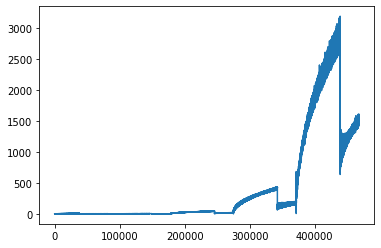

In [9]:
import matplotlib.pyplot as plt
import numpy as np

l_1 = np.array(l_1)
l_2 = np.array(l_2)


plt.plot(l_1/l_2)

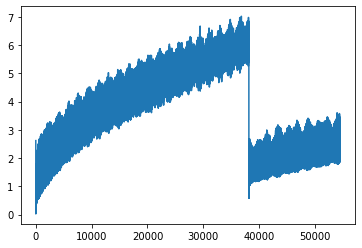

In [2]:
import matplotlib.pyplot as plt
import numpy as np

l_1 = []
l_2 = []
with open("loss_values.txt", "r") as myfile:
    for line in myfile:
        l_1.append(float(line.strip().split(',')[0][1:]))
        l_2.append(float(line.strip().split(',')[1][:-1]))

l_1 = np.array(l_1)
l_2 = np.array(l_2)


plt.plot(l_1/l_2)

In [10]:
(m,d) = torch.load('saved_models/model_2021-03-25 19-55-19.pkl')

ModuleNotFoundError: No module named 'models'

In [2]:
x,y = 10.4345,17.34545

print(f'({x},{y}) \n')

(10.4345,17.34545) 



In [8]:
d.eval(m, 'test', -1)


({'rhs': 0.8182445168495178, 'lhs': 0.7715147733688354},
 {'rhs': tensor([0.7552, 0.8656, 0.9218]),
  'lhs': tensor([0.7092, 0.8159, 0.8731])})

In [32]:
f'a {txt}.df'

'a 2021-03-25 19:03:41.df'

In [25]:
from datetime import datetime

now = datetime.now()
txt = str(now)[:19].replace(':','-')


In [33]:
str(now)[:19].replace(':','-')

'2021-03-25 19-03-41'

In [11]:
ls -ahl saved_models/

total 741M
drwxr-xr-x  3 root root 4.0K May 19 18:27  ./
drwxrwxr-x 11 1004 1004 4.0K May 19 18:32  ../
drwxr-xr-x  2 root root 4.0K Mar 25 19:21  .ipynb_checkpoints/
-rw-r--r--  1 root root 116M May 19 10:23  2021-05-19_10-23-09_ComplEx_NNE_FB237_mu_10.pkl
-rw-r--r--  1 root root 116M May 19 15:20  2021-05-19_15-20-11_FB237_ComplEx.pkl
-rw-r--r--  1 root root 160M May 19 18:28  2021-05-19_18-27-59_FB15K_ComplEx.pkl
-rw-r--r--  1 root root 116M May 17 20:48  ComplEx_NNE_FB237_2021-05-17_20-48-10.pkl
-rw-r--r--  1 root root 169M Mar 25 19:55 'model_2021-03-25 19-55-19.pkl'
-rw-r--r--  1 root root  68M Mar 25 17:18  model_data.pkl


# May 10

In [3]:
%run kbc/learn.py --dataset FB237 --model ComplEx_NNE --rank 500 --optimizer Adagrad --learning_rate 1e-1 --batch_size 1000 --regularizer N3 --reg 1e-2 --max_epochs 120 --valid 5



=====> Parameter settings: Namespace(batch_size=1000, dataset='FB237', decay1=0.9, decay2=0.999, init=0.001, learning_rate=0.1, max_epochs=120, model='ComplEx_NNE', optimizer='Adagrad', rank=500, reg=0.01, regularizer='N3', valid=5.0)

=====> Rule set path: /home/ComplEx-Inject/kbc/src_data/FB237/kbc_id_cons.txt
474
(14541, 474, 14541)
======> mu value: 100


train loss:   0%|          | 0/544230 [00:00<?, ?ex/s]

check model type


train loss:   1%|          | 4000/544230 [00:00<00:23, 23459.08ex/s, loss=7]

	 TRAIN:  {'MRR': 0.9125830829143524, 'hits@[1,3,10]': tensor([0.8724, 0.9454, 0.9761])}
	 VALID :  {'MRR': 0.3378174975514412, 'hits@[1,3,10]': tensor([0.2462, 0.3711, 0.5224])}


train loss:   0%|          | 2000/544230 [00:00<00:31, 17185.90ex/s, loss=5]

	 TRAIN:  {'MRR': 0.9602514803409576, 'hits@[1,3,10]': tensor([0.9392, 0.9789, 0.9922])}
	 VALID :  {'MRR': 0.34355488419532776, 'hits@[1,3,10]': tensor([0.2514, 0.3766, 0.5298])}


train loss:   1%|          | 4000/544230 [00:00<00:24, 22471.77ex/s, loss=5]

	 TRAIN:  {'MRR': 0.9751888513565063, 'hits@[1,3,10]': tensor([0.9614, 0.9874, 0.9957])}
	 VALID :  {'MRR': 0.3468359559774399, 'hits@[1,3,10]': tensor([0.2546, 0.3790, 0.5353])}


train loss:   1%|          | 3000/544230 [00:00<00:31, 17366.46ex/s, loss=5]

	 TRAIN:  {'MRR': 0.9830747842788696, 'hits@[1,3,10]': tensor([0.9732, 0.9921, 0.9977])}
	 VALID :  {'MRR': 0.3485139161348343, 'hits@[1,3,10]': tensor([0.2568, 0.3819, 0.5349])}


train loss:   1%|          | 3000/544230 [00:00<00:27, 19972.83ex/s, loss=5]

	 TRAIN:  {'MRR': 0.9849869608879089, 'hits@[1,3,10]': tensor([0.9761, 0.9932, 0.9984])}
	 VALID :  {'MRR': 0.3496285006403923, 'hits@[1,3,10]': tensor([0.2570, 0.3836, 0.5376])}


train loss:   1%|          | 3000/544230 [00:00<00:26, 20634.96ex/s, loss=6] 

	 TRAIN:  {'MRR': 0.9880184233188629, 'hits@[1,3,10]': tensor([0.9806, 0.9948, 0.9989])}
	 VALID :  {'MRR': 0.35062047094106674, 'hits@[1,3,10]': tensor([0.2593, 0.3833, 0.5357])}


train loss:   1%|          | 3000/544230 [00:00<00:29, 18146.99ex/s, loss=8]

	 TRAIN:  {'MRR': 0.989506721496582, 'hits@[1,3,10]': tensor([0.9831, 0.9952, 0.9991])}
	 VALID :  {'MRR': 0.3503958582878113, 'hits@[1,3,10]': tensor([0.2588, 0.3830, 0.5380])}


train loss:   1%|          | 3000/544230 [00:00<00:24, 22089.35ex/s, loss=6]

	 TRAIN:  {'MRR': 0.990334540605545, 'hits@[1,3,10]': tensor([0.9844, 0.9959, 0.9994])}
	 VALID :  {'MRR': 0.3515690118074417, 'hits@[1,3,10]': tensor([0.2600, 0.3845, 0.5374])}


train loss:   1%|          | 3000/544230 [00:00<00:27, 20003.52ex/s, loss=7]

	 TRAIN:  {'MRR': 0.9908869564533234, 'hits@[1,3,10]': tensor([0.9851, 0.9962, 0.9994])}
	 VALID :  {'MRR': 0.35165564715862274, 'hits@[1,3,10]': tensor([0.2600, 0.3848, 0.5384])}


train loss:   1%|          | 4000/544230 [00:00<00:24, 21848.79ex/s, loss=7]

	 TRAIN:  {'MRR': 0.9917183816432953, 'hits@[1,3,10]': tensor([0.9866, 0.9964, 0.9993])}
	 VALID :  {'MRR': 0.35176508128643036, 'hits@[1,3,10]': tensor([0.2598, 0.3862, 0.5379])}


train loss:   1%|          | 4000/544230 [00:00<00:20, 25818.20ex/s, loss=5]

	 TRAIN:  {'MRR': 0.9920012652873993, 'hits@[1,3,10]': tensor([0.9872, 0.9964, 0.9993])}
	 VALID :  {'MRR': 0.3525082767009735, 'hits@[1,3,10]': tensor([0.2604, 0.3859, 0.5379])}


train loss:   1%|          | 3000/544230 [00:00<00:28, 18849.87ex/s, loss=5]

	 TRAIN:  {'MRR': 0.9919262826442719, 'hits@[1,3,10]': tensor([0.9870, 0.9963, 0.9993])}
	 VALID :  {'MRR': 0.3524368107318878, 'hits@[1,3,10]': tensor([0.2603, 0.3866, 0.5393])}


train loss:   1%|          | 3000/544230 [00:00<00:26, 20262.93ex/s, loss=5]

	 TRAIN:  {'MRR': 0.9924542307853699, 'hits@[1,3,10]': tensor([0.9879, 0.9966, 0.9994])}
	 VALID :  {'MRR': 0.35244986414909363, 'hits@[1,3,10]': tensor([0.2600, 0.3861, 0.5386])}


train loss:   1%|          | 4000/544230 [00:00<00:22, 24476.28ex/s, loss=15]

	 TRAIN:  {'MRR': 0.9925876557826996, 'hits@[1,3,10]': tensor([0.9881, 0.9968, 0.9996])}
	 VALID :  {'MRR': 0.35276496410369873, 'hits@[1,3,10]': tensor([0.2604, 0.3872, 0.5394])}


train loss:   1%|          | 3000/544230 [00:00<00:26, 20455.80ex/s, loss=12]

	 TRAIN:  {'MRR': 0.9929518699645996, 'hits@[1,3,10]': tensor([0.9887, 0.9968, 0.9993])}
	 VALID :  {'MRR': 0.35327617824077606, 'hits@[1,3,10]': tensor([0.2614, 0.3877, 0.5392])}


train loss:   1%|          | 3000/544230 [00:00<00:26, 20480.60ex/s, loss=8] 

	 TRAIN:  {'MRR': 0.992319643497467, 'hits@[1,3,10]': tensor([0.9877, 0.9964, 0.9993])}
	 VALID :  {'MRR': 0.3528488576412201, 'hits@[1,3,10]': tensor([0.2605, 0.3876, 0.5386])}


train loss:   1%|          | 3000/544230 [00:00<00:26, 20489.54ex/s, loss=9]

	 TRAIN:  {'MRR': 0.9931322932243347, 'hits@[1,3,10]': tensor([0.9891, 0.9969, 0.9994])}
	 VALID :  {'MRR': 0.35271045565605164, 'hits@[1,3,10]': tensor([0.2606, 0.3869, 0.5391])}


train loss:   1%|          | 3000/544230 [00:00<00:26, 20633.78ex/s, loss=7]

	 TRAIN:  {'MRR': 0.9929659366607666, 'hits@[1,3,10]': tensor([0.9887, 0.9968, 0.9995])}
	 VALID :  {'MRR': 0.35259638726711273, 'hits@[1,3,10]': tensor([0.2604, 0.3871, 0.5393])}


train loss:   1%|          | 4000/544230 [00:00<00:22, 24348.92ex/s, loss=7]

	 TRAIN:  {'MRR': 0.9937754273414612, 'hits@[1,3,10]': tensor([0.9901, 0.9971, 0.9995])}
	 VALID :  {'MRR': 0.3530895411968231, 'hits@[1,3,10]': tensor([0.2612, 0.3863, 0.5383])}


train loss:   1%|          | 4000/544230 [00:00<00:21, 24834.92ex/s, loss=8]

	 TRAIN:  {'MRR': 0.992963045835495, 'hits@[1,3,10]': tensor([0.9887, 0.9969, 0.9995])}
	 VALID :  {'MRR': 0.3530605584383011, 'hits@[1,3,10]': tensor([0.2605, 0.3872, 0.5396])}


train loss:   1%|          | 3000/544230 [00:00<00:29, 18117.87ex/s, loss=7]

	 TRAIN:  {'MRR': 0.9933064579963684, 'hits@[1,3,10]': tensor([0.9892, 0.9970, 0.9996])}
	 VALID :  {'MRR': 0.35312730073928833, 'hits@[1,3,10]': tensor([0.2610, 0.3873, 0.5390])}


train loss:   1%|          | 4000/544230 [00:00<00:22, 23553.85ex/s, loss=7]

	 TRAIN:  {'MRR': 0.9930683672428131, 'hits@[1,3,10]': tensor([0.9889, 0.9967, 0.9994])}
	 VALID :  {'MRR': 0.35367351770401, 'hits@[1,3,10]': tensor([0.2615, 0.3874, 0.5405])}


train loss:   1%|          | 4000/544230 [00:00<00:23, 23458.60ex/s, loss=7]

	 TRAIN:  {'MRR': 0.9932871758937836, 'hits@[1,3,10]': tensor([0.9892, 0.9970, 0.9994])}
	 VALID :  {'MRR': 0.35314784944057465, 'hits@[1,3,10]': tensor([0.2611, 0.3870, 0.5397])}


train loss: 100%|██████████| 544230/544230 [00:24<00:00, 22183.52ex/s, loss=7]


	 TRAIN:  {'MRR': 0.9936621189117432, 'hits@[1,3,10]': tensor([0.9899, 0.9972, 0.9995])}
	 VALID :  {'MRR': 0.3534121513366699, 'hits@[1,3,10]': tensor([0.2611, 0.3874, 0.5403])}


TEST :  ({'rhs': 0.4451044201850891, 'lhs': 0.24951453506946564}, {'rhs': tensor([0.3483, 0.4881, 0.6378]), 'lhs': tensor([0.1628, 0.2727, 0.4277])})


In [ ]:
# FB237 - ComplEx
# TEST :  ({'rhs': 0.43725693225860596, 'lhs': 0.24350158870220184}, {'rhs': tensor([0.3430, 0.4798, 0.6232]), 'lhs': tensor([0.1607, 0.2649, 0.4099])})
#

(544300, 544300)


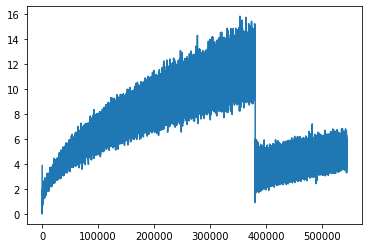

In [2]:
l_1 = []
l_2 = []
with open("loss_values_mu_100_neg_cong.txt", "r") as myfile:
    for line in myfile:
        l_1.append(float(line.strip().split(',')[0][1:]))
        l_2.append(float(line.strip().split(',')[1][:-1]))
        
        
        
print((len(l_1) , len(l_2)))


import matplotlib.pyplot as plt
import numpy as np

l_1 = np.array(l_1)
l_2 = np.array(l_2)


plt.plot(l_1/l_2)

(65400, 65400)


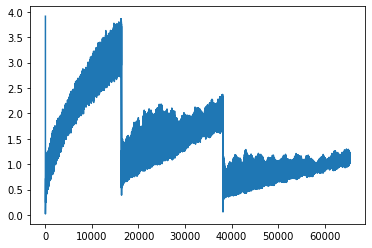

In [6]:
l_1 = []
l_2 = []
with open("Mehrdad_loss_values_mu_10_neg_cong.txt", "r") as myfile:
    for line in myfile:
        l_1.append(float(line.strip().split(',')[0][1:]))
        l_2.append(float(line.strip().split(',')[1][:-1]))
        
        
        
print((len(l_1) , len(l_2)))


import matplotlib.pyplot as plt
import numpy as np

l_1 = np.array(l_1)
l_2 = np.array(l_2)


plt.plot(l_1/l_2)

## Try ignoring the conjugate rules:

In [1]:
%run kbc/learn.py --dataset FB237 --model ComplEx_NNE --rank 500 --optimizer Adagrad --learning_rate 1e-1 --batch_size 1000 --regularizer N3 --reg 1e-2 --max_epochs 120 --valid 5



=====> Parameter settings: Namespace(batch_size=1000, dataset='FB237', decay1=0.9, decay2=0.999, init=0.001, learning_rate=0.1, max_epochs=120, model='ComplEx_NNE', optimizer='Adagrad', rank=500, reg=0.01, regularizer='N3', valid=5.0)

=====> Rule set path: /home/ComplEx-Inject/kbc/src_data/FB237/kbc_id_cons.txt
474
[-1, -1, -1, 1, 1, -1, -1, 1, -1, -1, -1, -1, -1, -1, 1, 1, 1, -1, -1, 1, -1, 1, -1, -1, 1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, -1, -1, -1, 1, 1, -1, 1, 1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, 1, 1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, 1, -1]
(14541, 474, 14541)
======> mu value: 100


train loss:   0%|          | 0/544230 [00:00<?, ?ex/s]

check model type


train loss:   1%|          | 3000/544230 [00:00<00:25, 21501.86ex/s, loss=6]

	 TRAIN:  {'MRR': 0.9129205644130707, 'hits@[1,3,10]': tensor([0.8744, 0.9444, 0.9746])}
	 VALID :  {'MRR': 0.3364519625902176, 'hits@[1,3,10]': tensor([0.2445, 0.3700, 0.5235])}


train loss:   1%|          | 3000/544230 [00:00<00:24, 21759.20ex/s, loss=6]

	 TRAIN:  {'MRR': 0.9670659303665161, 'hits@[1,3,10]': tensor([0.9503, 0.9816, 0.9917])}
	 VALID :  {'MRR': 0.3425396904349327, 'hits@[1,3,10]': tensor([0.2507, 0.3763, 0.5294])}


train loss:   1%|          | 3000/544230 [00:00<00:27, 19850.14ex/s, loss=5]

	 TRAIN:  {'MRR': 0.982257604598999, 'hits@[1,3,10]': tensor([0.9733, 0.9902, 0.9947])}
	 VALID :  {'MRR': 0.3454718589782715, 'hits@[1,3,10]': tensor([0.2538, 0.3790, 0.5311])}


train loss:   1%|          | 5000/544230 [00:00<00:20, 26548.41ex/s, loss=5]

	 TRAIN:  {'MRR': 0.9890399277210236, 'hits@[1,3,10]': tensor([0.9837, 0.9938, 0.9967])}
	 VALID :  {'MRR': 0.3470173701643944, 'hits@[1,3,10]': tensor([0.2544, 0.3823, 0.5330])}


train loss:   1%|          | 3000/544230 [00:00<00:23, 22716.20ex/s, loss=5]

	 TRAIN:  {'MRR': 0.9932662844657898, 'hits@[1,3,10]': tensor([0.9903, 0.9959, 0.9972])}
	 VALID :  {'MRR': 0.3485999330878258, 'hits@[1,3,10]': tensor([0.2569, 0.3839, 0.5342])}


train loss:   1%|          | 3000/544230 [00:00<00:28, 18867.34ex/s, loss=6] 

	 TRAIN:  {'MRR': 0.994577169418335, 'hits@[1,3,10]': tensor([0.9921, 0.9970, 0.9976])}
	 VALID :  {'MRR': 0.3498126268386841, 'hits@[1,3,10]': tensor([0.2588, 0.3827, 0.5329])}


train loss:   1%|          | 5000/544230 [00:00<00:19, 28284.66ex/s, loss=8]

	 TRAIN:  {'MRR': 0.9954831302165985, 'hits@[1,3,10]': tensor([0.9939, 0.9970, 0.9975])}
	 VALID :  {'MRR': 0.35055458545684814, 'hits@[1,3,10]': tensor([0.2600, 0.3835, 0.5359])}


train loss:   1%|          | 4000/544230 [00:00<00:18, 29095.39ex/s, loss=7]

	 TRAIN:  {'MRR': 0.995417445898056, 'hits@[1,3,10]': tensor([0.9936, 0.9972, 0.9975])}
	 VALID :  {'MRR': 0.35051092505455017, 'hits@[1,3,10]': tensor([0.2600, 0.3826, 0.5354])}


train loss:   1%|          | 3000/544230 [00:00<00:28, 19164.21ex/s, loss=7]

	 TRAIN:  {'MRR': 0.9958880543708801, 'hits@[1,3,10]': tensor([0.9946, 0.9972, 0.9973])}
	 VALID :  {'MRR': 0.35041671991348267, 'hits@[1,3,10]': tensor([0.2595, 0.3839, 0.5343])}


train loss:   1%|          | 4000/544230 [00:00<00:21, 24614.89ex/s, loss=7]

	 TRAIN:  {'MRR': 0.9963432252407074, 'hits@[1,3,10]': tensor([0.9951, 0.9976, 0.9977])}
	 VALID :  {'MRR': 0.3508633077144623, 'hits@[1,3,10]': tensor([0.2589, 0.3836, 0.5362])}


train loss:   1%|          | 4000/544230 [00:00<00:21, 25397.19ex/s, loss=5]

	 TRAIN:  {'MRR': 0.9964300692081451, 'hits@[1,3,10]': tensor([0.9953, 0.9976, 0.9977])}
	 VALID :  {'MRR': 0.3505433052778244, 'hits@[1,3,10]': tensor([0.2589, 0.3838, 0.5352])}


train loss:   1%|          | 5000/544230 [00:00<00:18, 29601.14ex/s, loss=6]

	 TRAIN:  {'MRR': 0.9962246417999268, 'hits@[1,3,10]': tensor([0.9952, 0.9973, 0.9973])}
	 VALID :  {'MRR': 0.3510235548019409, 'hits@[1,3,10]': tensor([0.2597, 0.3844, 0.5362])}


train loss:   1%|          | 4000/544230 [00:00<00:19, 27460.66ex/s, loss=5]

	 TRAIN:  {'MRR': 0.9966447055339813, 'hits@[1,3,10]': tensor([0.9956, 0.9977, 0.9978])}
	 VALID :  {'MRR': 0.3523949980735779, 'hits@[1,3,10]': tensor([0.2614, 0.3850, 0.5371])}


train loss:   1%|          | 4000/544230 [00:00<00:20, 26292.13ex/s, loss=15]

	 TRAIN:  {'MRR': 0.996753066778183, 'hits@[1,3,10]': tensor([0.9958, 0.9977, 0.9978])}
	 VALID :  {'MRR': 0.35171881318092346, 'hits@[1,3,10]': tensor([0.2605, 0.3850, 0.5365])}


train loss:   1%|          | 3000/544230 [00:00<00:25, 21301.44ex/s, loss=12]

	 TRAIN:  {'MRR': 0.9964220523834229, 'hits@[1,3,10]': tensor([0.9954, 0.9974, 0.9975])}
	 VALID :  {'MRR': 0.3519798517227173, 'hits@[1,3,10]': tensor([0.2606, 0.3843, 0.5371])}


train loss:   1%|          | 4000/544230 [00:00<00:21, 25163.56ex/s, loss=10]

	 TRAIN:  {'MRR': 0.9965845346450806, 'hits@[1,3,10]': tensor([0.9957, 0.9975, 0.9975])}
	 VALID :  {'MRR': 0.3517819792032242, 'hits@[1,3,10]': tensor([0.2608, 0.3838, 0.5374])}


train loss:   1%|          | 4000/544230 [00:00<00:23, 22877.44ex/s, loss=7]

	 TRAIN:  {'MRR': 0.996517688035965, 'hits@[1,3,10]': tensor([0.9956, 0.9974, 0.9975])}
	 VALID :  {'MRR': 0.35214680433273315, 'hits@[1,3,10]': tensor([0.2608, 0.3850, 0.5373])}


train loss:   1%|          | 3000/544230 [00:00<00:25, 21266.09ex/s, loss=7]

	 TRAIN:  {'MRR': 0.9971041679382324, 'hits@[1,3,10]': tensor([0.9965, 0.9977, 0.9978])}
	 VALID :  {'MRR': 0.35187871754169464, 'hits@[1,3,10]': tensor([0.2604, 0.3849, 0.5368])}


train loss:   1%|          | 3000/544230 [00:00<00:24, 22129.48ex/s, loss=8]

	 TRAIN:  {'MRR': 0.9968701601028442, 'hits@[1,3,10]': tensor([0.9962, 0.9975, 0.9975])}
	 VALID :  {'MRR': 0.35281266272068024, 'hits@[1,3,10]': tensor([0.2615, 0.3859, 0.5367])}


train loss:   1%|          | 4000/544230 [00:00<00:24, 21841.66ex/s, loss=8]

	 TRAIN:  {'MRR': 0.9972283244132996, 'hits@[1,3,10]': tensor([0.9966, 0.9978, 0.9979])}
	 VALID :  {'MRR': 0.35282444953918457, 'hits@[1,3,10]': tensor([0.2615, 0.3857, 0.5370])}


train loss:   1%|          | 4000/544230 [00:00<00:23, 22821.09ex/s, loss=7]

	 TRAIN:  {'MRR': 0.9967546164989471, 'hits@[1,3,10]': tensor([0.9958, 0.9976, 0.9977])}
	 VALID :  {'MRR': 0.3532731831073761, 'hits@[1,3,10]': tensor([0.2624, 0.3852, 0.5372])}


train loss:   1%|          | 3000/544230 [00:00<00:29, 18473.20ex/s, loss=7]

	 TRAIN:  {'MRR': 0.9969435334205627, 'hits@[1,3,10]': tensor([0.9962, 0.9977, 0.9977])}
	 VALID :  {'MRR': 0.35318590700626373, 'hits@[1,3,10]': tensor([0.2622, 0.3851, 0.5376])}


train loss:   1%|          | 3000/544230 [00:00<00:24, 22341.74ex/s, loss=7]

	 TRAIN:  {'MRR': 0.9967684745788574, 'hits@[1,3,10]': tensor([0.9960, 0.9975, 0.9975])}
	 VALID :  {'MRR': 0.3531293720006943, 'hits@[1,3,10]': tensor([0.2622, 0.3854, 0.5374])}


train loss: 100%|██████████| 544230/544230 [00:28<00:00, 19120.13ex/s, loss=7]


	 TRAIN:  {'MRR': 0.9967761635780334, 'hits@[1,3,10]': tensor([0.9961, 0.9974, 0.9975])}
	 VALID :  {'MRR': 0.35340043902397156, 'hits@[1,3,10]': tensor([0.2622, 0.3849, 0.5378])}


TEST :  ({'rhs': 0.44387710094451904, 'lhs': 0.24980111420154572}, {'rhs': tensor([0.3465, 0.4904, 0.6368]), 'lhs': tensor([0.1631, 0.2733, 0.4278])})


In [71]:
# TEST :  ({'rhs': 0.4451044201850891, 'lhs': 0.24951453506946564}, {'rhs': tensor([0.3483, 0.4881, 0.6378]), 'lhs': tensor([0.1628, 0.2727, 0.4277])})

## Checking rules


In [95]:
#
#
# for loop over the rules set/ relations in the rule set
#

In [96]:
ls ./

2021-05-19_10-23-09_FB237_img_compare_ComplEx_NNE_mu_10.txt
2021-05-19_10-23-09_FB237_real_compare_ComplEx_NNE_mu_10.txt
2021-05-19_15-20-11_FB237_ComplEx_img_compare.txt
2021-05-19_15-20-11_FB237_ComplEx_real_compare.txt
2021-05-19_20-15-33_FB237_ComplEx_img_compare.txt
2021-05-19_20-15-33_FB237_ComplEx_real_compare.txt
2021-05-26_10-28-42_FB237_ComplEx_NNE_mu_10_img_compare.txt
2021-05-26_10-28-42_FB237_ComplEx_NNE_mu_10_real_compare.txt
237_conjugate_loss_values_mu_10.txt
237_ignore_loss_values_mu_100.txt
CODE_OF_CONDUCT.md
CONTRIBUTING.md
ComplEx_NNE_FB237_baseline_mu_0.01.txt
FB237img_compare_2021-05-17_20-48-10.txt
FB237real_compare_2021-05-17_20-48-10.txt
LICENSE
Mehrdad_loss_values_mu_10_neg_cong.txt
README.md
Untitled.ipynb
build/
dist/
kbc/
kbc.egg-info/
loss_values_mu_100_neg_cong.txt
loss_values_mu_10_neg_cong.txt
loss_values_mu_1e-1.txt
model_data.pkl
negative_rule_ebd_fb237_mu_10.txt
requirements.txt
result/
saved_models/
setup.py


In [176]:
# import torch
#from models import CP, ComplEx, ComplEx_NNE
(m,d) = torch.load('saved_models/ComplEx_NNE_FB237_2021-05-17_20-48-10.pkl')
# (m,d) = torch.load('saved_models/2021-05-19_15-20-11_FB237_ComplEx.pkl')

In [177]:
m

ComplEx_NNE(
  (embeddings): ModuleList(
    (0): Embedding(14541, 1000, sparse=True)
    (1): Embedding(474, 1000, sparse=True)
  )
)

In [178]:
rule_path = 'kbc/src_data/FB237/kbc_id_cons_all.txt'
print("\n=====> Rule set path: " + str(rule_path))
#### read in & convert rule ids and confidence
# get number of predicates
#r_num = dataset.get_shape()[1] // 2
#print (r_num)
# if args.model == 'ComplEx_NNE':
kbc_id_conf_f = rule_path
r_p_list = []
r_q_list = []
conf_list = []
neg_list = []
with open(kbc_id_conf_f, 'r') as f:
    while True:
        line = f.readline()
        if line:
            # two relations split by ',', confidence split by tab
            line.replace('\n', '')
            r_p = int(line.split(',')[0])
            if r_p < 0:
                # print("ignore negative rules")
                neg_list.append(-1)
                r_p = -r_p
#                 if r_p >= r_num:
#                     print("suspicious relation id: " + str(r_p))
            else:
                neg_list.append(1)
            r_q = int(line.split(',')[1].split('\t')[0])
            conf = float(line.split('\t')[1])
            # print(rel0, rel1, conf)
            r_p_list.append(r_p)
            r_q_list.append(r_q)
            conf_list.append(conf)
            # print(r_p, r_q, conf)
        else:
            break
rule_list = [r_p_list, r_q_list, conf_list, neg_list]
print(rule_list)


=====> Rule set path: kbc/src_data/FB237/kbc_id_cons_all.txt
[[123, 57, 65, 200, 77, 20, 123, 114, 107, 114, 111, 24, 105, 33, 178, 177, 151, 166, 123, 111, 51, 110, 188, 194, 194, 25, 156, 12, 215, 122, 121, 121, 101, 22, 40, 41, 38, 163, 162, 181, 178, 175, 63, 197, 77, 2, 161, 31, 40, 39, 38, 115, 0, 175, 177, 195, 66, 180, 197, 200, 164, 123, 122, 122, 40, 41, 39, 197, 77, 39, 38, 41, 194, 188, 188, 25], [129, 57, 65, 197, 197, 20, 111, 111, 107, 123, 123, 24, 105, 33, 175, 175, 71, 166, 114, 114, 51, 115, 188, 188, 188, 45, 156, 12, 215, 122, 122, 122, 23, 23, 39, 39, 39, 163, 162, 181, 177, 177, 63, 199, 199, 2, 161, 31, 41, 41, 41, 110, 127, 178, 178, 195, 66, 180, 77, 77, 164, 128, 121, 121, 38, 38, 38, 200, 200, 40, 40, 40, 194, 194, 194, 113], [0.828571429, 0.855895197, 0.8173258, 1.0, 0.991017964, 0.860927152, 0.81919147, 0.8125, 0.944751381, 0.809924679, 0.816290394, 0.820800956, 0.939130435, 0.824987605, 1.0, 1.0, 0.834196891, 0.88, 0.812444444, 0.810703229, 0.832214765, 

In [216]:
import numpy as np
rel = m.embeddings[1]
idx_p = torch.LongTensor(rule_list[0]).cuda()
idx_q = torch.LongTensor(rule_list[1]).cuda()
#print(torch.max(idx_p))

r_p_ebds = rel(idx_p)
r_p_ebds = r_p_ebds[:, :m.rank], r_p_ebds[:, m.rank:]
r_q_ebds = rel(idx_q)
r_q_ebds = r_q_ebds[:, :m.rank], r_q_ebds[:, m.rank:]
img_difference = []
rel_difference = []

p_lt_q_mat = np.zeros((76,500),dtype=np.float64)
for i in range(len(rule_list[0])):
    # for all rules, real(r_p) < real(r_q)
    # ignore those that r_p == r_q
    if rule_list[0][i] == rule_list[1][i]:
        p_lt_q_mat[i,:] = np.ones(500)
    else:
        p_lt_q = torch.lt(r_p_ebds[0][i], r_q_ebds[0][i]).cpu().detach().numpy()
        p_lt_q_mat[i,:]  = p_lt_q #= np.vstack((p_lt_q,p_lt_q))
    
    #real_file.write(', '.join(map(str, p_lt_q)) + '\n')
    #rel_difference.append(torch.sum(torch.abs(r_p_ebds[0][i] - r_p_ebds[0][i])).item())
    # for negative entailment rules, img(r_p) == -img(r_q), calculate the difference
#     if rule_list[3][i] < 0:
#         img_tensor = torch.square(r_p_ebds[1][i] + r_q_ebds[1][i])
#         img_file.write(', '.join(map(str, img_tensor.tolist())) + '\n')
#         img_difference.append(torch.sum(img_tensor).item())
#     # for entailment rules, img(r_p) == img(r_q), calculate the difference
#     else:
#         img_tensor = torch.square(r_p_ebds[1][i] - r_q_ebds[1][i])
#         img_file.write(','.join(map(str, img_tensor.tolist())) + '\n')
#         img_difference.append(torch.sum(img_tensor).item())

In [217]:
p_lt_q_mat.shape
p_lt_q_mat
#np.cumsum(p_lt_q_mat,axis=1)

array([[1., 1., 1., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 1., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [182]:
s = np.sum(p_lt_q_mat,axis=1)

sum(s < 200)

2

In [183]:
len(s)

76

In [186]:
ids = [(i,v) for (i,v) in enumerate(s) if (v < 200)]

In [187]:
for x in ids:
    print(rule_list[0][x[0]] , rule_list[1][x[0]], rule_list[3][x[0]])

122 121 -1
122 121 1


In [130]:
print(rule_list[0][63] , rule_list[1][63])

122 121


In [127]:
for i in range(len(rule_list[0])):
    print(rule_list[0][i] , rule_list[1][i])



123 129
57 57
65 65
200 197
77 197
20 20
123 111
114 111
107 107
114 123
111 123
24 24
105 105
33 33
178 175
177 175
151 71
166 166
123 114
111 114
51 51
110 115
188 188
194 188
194 188
25 45
156 156
12 12
215 215
122 122
121 122
121 122
101 23
22 23
40 39
41 39
38 39
163 163
162 162
181 181
178 177
175 177
63 63
197 199
77 199
2 2
161 161
31 31
40 41
39 41
38 41
115 110
0 127
175 178
177 178
195 195
66 66
180 180
197 77
200 77
164 164
123 128
122 121
122 121
40 38
41 38
39 38
197 200
77 200
39 40
38 40
41 40
194 194
188 194
188 194
25 113


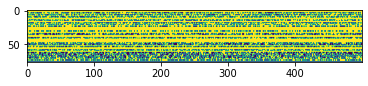

In [66]:
import matplotlib.pyplot as plt

plt.imshow(p_lt_q_mat)

In [ ]:
# look at the failed relations
# look at their triplet in the train and test set

# 5 of these difficult rules and try to inject them until the inequality is satidfied 

## Checking Entity Embedding and triple scores

In [77]:
%run kbc/learn.py --dataset FB237 --model ComplEx --rank 500 --optimizer Adagrad --learning_rate 1e-1 --batch_size 1000 --regularizer N3 --reg 1e-2 --max_epochs 1 --valid 5


======> Parameter settings: Namespace(batch_size=1000, dataset='FB237', decay1=0.9, decay2=0.999, init=0.001, learning_rate=0.1, max_epochs=1, model='ComplEx', optimizer='Adagrad', rank=500, reg=0.01, regularizer='N3', valid=5.0)
original training number: 272115
sample training number: 272115


train loss:   0%|          | 2000/544230 [00:00<00:09, 59632.82ex/s, loss=10]


======> Number of relations: 237
(14541, 474, 14541)
======> Checking model type


train loss: 100%|██████████| 544230/544230 [00:08<00:00, 65429.26ex/s, loss=5]


# of triples in ranking: 20466


TEST :  ({'rhs': 0.40205106139183044, 'lhs': 0.20177946984767914}, {'rhs': tensor([0.3063, 0.4434, 0.5942]), 'lhs': tensor([0.1213, 0.2212, 0.3646])})


In [54]:
#### original training and test
# (m_1,d_1) = torch.load('saved_models/2021-05-26_16-30-31_FB237_ComplEx_NNE_mu_10.pkl')
# (m_2,d_2) = torch.load('saved_models/2021-05-19_15-20-11_FB237_ComplEx.pkl')
#### original training, 1089 related test
(m_1,d_1) = torch.load('saved_models/2021-06-23_00-56-59_FB237_ComplEx_NNE_mu_10.pkl')
(m_2,d_2) = torch.load('saved_models/2021-06-22_15-49-33_FB237_ComplEx.pkl')
#### original training, extracted enatilment test
#### ComplEx_NNE vs ComplEx vs ComplEx_NNE_original
# (m_1,d_1) = torch.load('saved_models/2021-06-29_18-54-09_FB237_ComplEx_NNE_mu_10.pkl')
# (m_2,d_2) = torch.load('saved_models/2021-06-25_20-48-05_FB237_ComplEx.pkl')
# (m_2,d_2) = torch.load('saved_models/2021-05-26_16-30-31_FB237_ComplEx_NNE_mu_10.pkl')
#### ComplEx_NNE vs ComplEx, no inverse training
# (m_1,d_1) = torch.load('saved_models/2021-06-29_23-07-54_FB237_ComplEx_NNE_mu_10.pkl')
# (m_2,d_2) = torch.load('saved_models/2021-06-30_03-52-29_FB237_ComplEx.pkl')

In [55]:
# rule_path = 'kbc/src_data/FB237/kbc_id_cons_all.txt'
rule_path = 'kbc/src_data/FB237/kbc_id_cons.txt'
#### read in & convert rule ids and confidence
# get number of predicates
#r_num = dataset.get_shape()[1] // 2
#print (r_num)
# if args.model == 'ComplEx_NNE':
kbc_id_conf_f = rule_path
r_p_list = []
r_q_list = []
conf_list = []
neg_list = []
rule_dict = dict()
with open(kbc_id_conf_f, 'r') as f:
    while True:
        line = f.readline()
        if line:
            # two relations split by ',', confidence split by tab
            line.replace('\n', '')
            r_p = int(line.split(',')[0])
            if r_p < 0:
                # print("ignore negative rules")
                neg_list.append(-1)
                r_p = -r_p
#                 if r_p >= r_num:
#                     print("suspicious relation id: " + str(r_p))
            else:
                neg_list.append(1)
            r_q = int(line.split(',')[1].split('\t')[0])
            conf = float(line.split('\t')[1])
            # print(rel0, rel1, conf)
            r_p_list.append(r_p)
            r_q_list.append(r_q)
            conf_list.append(conf)
            if r_q not in rule_dict:
                rule_dict[r_q] = [r_p]
            else:
                rule_dict[r_q].append(r_p)
            # print(r_p, r_q, conf)
        else:
            break
rule_list = [r_p_list, r_q_list, conf_list, neg_list]
print(rule_dict)

{129: [123], 197: [200, 77], 111: [123], 175: [178, 177], 71: [151], 114: [123, 111], 115: [110], 45: [25], 122: [121], 23: [101, 22], 199: [197, 77], 41: [40, 39, 38], 127: [0], 178: [177], 77: [200], 128: [123], 38: [40], 40: [39], 194: [188], 113: [25]}


In [46]:
# rel_idx = set(rule_list[0]).union(set(rule_list[1]))
rel_head_idx = set(rule_list[0])
rel_tail_idx = set(rule_list[1])
# len(rel_idx), len(set(rule_list[0])), len(set(rule_list[1]))
# rel_head_idx, rel_tail_idx

In [56]:
# read entity triple id from test set
related_triples = []
# test_f = 'kbc/src_data/FB237/test'
# test_f = 'kbc/src_data/FB237/entailment_test2'
test_f = 'kbc/src_data/FB237/related_test'
# new_test_file = open('kbc/src_data/FB237/new_test', "a")

with open(test_f, 'r') as f:
    while True:
        line = f.readline()
        if line:
            # two relations split by ',', confidence split by tab
            line.replace('\n', '')
            lhs = int(line.split('\t')[0])
            rel = int(line.split('\t')[1])
            rhs = int(line.split('\t')[2])
#             if rel in rel_tail_idx:
#                 print((lhs, rel, rhs))
            related_triples.append((lhs, rel, rhs))
#                 new_test_file.write(str(lhs) + '\t' + str(rel) + '\t' + str(rhs) + '\n')
        else:
            break
            
# new_test_file.close()
print(len(related_triples))

1089


In [43]:
#read triples from training set
training_f = 'kbc/src_data/FB237/train'
train_triples = []
with open(training_f, 'r') as f:
    while True:
        line = f.readline()
        if line:
            # two relations split by ',', confidence split by tab
            line.replace('\n', '')
            lhs = int(line.split('\t')[0])
            rel = int(line.split('\t')[1])
            rhs = int(line.split('\t')[2])
            
#             if rel in rel_head_idx:
            train_triples.append((lhs, rel, rhs))
        else:
            break

print(len(train_triples))

272115


In [57]:
# read the embeddings and compute scores in both models?

import numpy as np

# read in embeddings from ComplEx_NNE
rel_1 = m_1.embeddings[1]
ent_1 = m_1.embeddings[0]

# read in embeddings from ComplEx_N3
rel_2 = m_2.embeddings[1]
ent_2 = m_2.embeddings[0]

# input = torch.LongTensor([[1]]).cuda()
# rel_2(input)

improve_cnt = 0
decrease_cnt = 0
improve_score_set = set()
improve_score = 0
decrease_score = 0
# compute loss function score of each triple in related triples
for i, (e1, r, e2) in enumerate(related_triples):
#     print(type(e1))
    e1 = torch.LongTensor([e1]).cuda()
    r = torch.LongTensor([r]).cuda()
    e2 = torch.LongTensor([e2]).cuda()
    
    lhs_1 = ent_1(e1)
    rel_ind_1 = rel_1(r)
    rhs_1 = ent_1(e2)
    rel_1
    
    lhs_1 = lhs_1[:, :m_1.rank], lhs_1[:, m_1.rank:]
    rel_ind_1 = rel_ind_1[:, :m_1.rank], rel_ind_1[:, m_1.rank:]
    rhs_1 = rhs_1[:, :m_1.rank], rhs_1[:, m_1.rank:]
#     print(lhs)
    score_1 = torch.sum(
            (lhs_1[0] * rel_ind_1[0] - lhs_1[1] * rel_ind_1[1]) * rhs_1[0] +
            (lhs_1[0] * rel_ind_1[1] + lhs_1[1] * rel_ind_1[0]) * rhs_1[1],
            1, keepdim=True
        )
    
    lhs_2 = ent_2(e1)
    rel_ind_2 = rel_2(r)
    rhs_2 = ent_2(e2)
    
    lhs_2 = lhs_2[:, :m_2.rank], lhs_2[:, m_2.rank:]
    rel_ind_2 = rel_ind_2[:, :m_2.rank], rel_ind_2[:, m_2.rank:]
    rhs_2 = rhs_2[:, :m_2.rank], rhs_2[:, m_2.rank:]
#     print(lhs)
    score_2 = torch.sum(
            (lhs_2[0] * rel_ind_2[0] - lhs_2[1] * rel_ind_2[1]) * rhs_2[0] +
            (lhs_2[0] * rel_ind_2[1] + lhs_2[1] * rel_ind_2[0]) * rhs_2[1],
            1, keepdim=True
        )
    
#     print (score_1, score_2)
    if score_1 > score_2:
        improve_cnt += 1
        improve_score_set.add(i)
        improve_score += (score_1 - score_2)
#     print(int(e1), int(r), int(e2), float(score_1 - score_2))
    elif score_1 < score_2:
        decrease_cnt += 1
        decrease_score += (score_2 - score_1)

print("improve triples # vs decreased triples #: " + str(improve_cnt) + " " + str(decrease_cnt))
print("average improve score vs average decrease score: " + str(float(improve_score/improve_cnt)) + " " + str(float(decrease_score/decrease_cnt)))

improve triples # vs decreased triples #: 700 389
average improve score vs average decrease score: 1.3795641660690308 1.0317379236221313


In [58]:
dataset = d_1
len(dataset.get_examples('test'))

1089

In [59]:
results_1 = dataset.rank_result(m_1, 'test', -1)
results_2 = dataset.rank_result(m_2, 'test', -1)
print(len(results_1[0]), len(results_2))
accuracy_1 = dataset.eval(m_1, 'test', -1)
accuracy_2 = dataset.eval(m_2, 'test', -1)
print(accuracy_1, accuracy_2)

1089 2
# of triples in ranking: 1089
# of triples in ranking: 1089
({'rhs': 0.28577810525894165, 'lhs': 0.32138389348983765}, {'rhs': tensor([0.2158, 0.3030, 0.4288]), 'lhs': tensor([0.2213, 0.3517, 0.5253])}) ({'rhs': 0.2640222907066345, 'lhs': 0.27841365337371826}, {'rhs': tensor([0.1983, 0.2782, 0.4013]), 'lhs': tensor([0.1818, 0.3122, 0.4702])})


In [60]:
# identify which test triples was failing but now successful completed
improve_cnt_rhs = 0
decrease_cnt_rhs = 0
improve_rank = 0
decrease_rank = 0
improve_rank_rhs_set = set()
for i, (t1, t2) in enumerate(zip(results_1[0], results_2[0])):
    if t1 < t2:
        improve_cnt_rhs += 1
        improve_rank += (t2 - t1)
        improve_rank_rhs_set.add(i)
#         print(int(t1), int(t2))
    elif t1 > t2:
        decrease_cnt_rhs += 1
        decrease_rank += (t1 - t2)

print("improve triples # vs decreased triples #: " + str(improve_cnt_rhs) + " " + str(decrease_cnt_rhs))
print("average improve rank vs average decrease rank: " + str(float(improve_rank/improve_cnt_rhs)) + " " + str(float(decrease_rank/decrease_cnt_rhs)))

# check those have better score but not better rank
not_improve_set = improve_score_set - improve_rank_rhs_set
print("Better score but not better rank: " + str(len(not_improve_set)))
print("Better rank but not better score: " + str(len(improve_rank_rhs_set - improve_score_set)))

# # for a -> b, (e1, b, e2)
# # check if (e1, a, e2) is in training set
# for i, (e1, r, e2) in enumerate(related_triples):
#     if i in improve_rank_rhs_set:
#         for head in rule_dict[r]:
#             if (e1, head, e2) in train_triples:
#                 print("head training tripe found")
# #### found no such triples among improved triples

# for i, (e1, r, e2) in enumerate(related_triples):
# #     print(e1, r, e2)
#     for head in rule_dict[r]:
#         if (e1, head, e2) in train_triples:
#             print("head training tripe found")
#### found no such triples in the whole test set

#### create test set? 
#### for a -> b, training data (e1, a, e2)
#### put (e1, b, e2) is in test set

improve triples # vs decreased triples #: 516 361
average improve rank vs average decrease rank: 384.00970458984375 436.1468200683594
Better score but not better rank: 360
Better rank but not better score: 176


## FB237: create specific entailment training & test set

In [ ]:
# read in all training triples
training_f = 'kbc/src_data/FB237/train'
train_triples = []
with open(training_f, 'r') as f:
    while True:
        line = f.readline()
        if line:
            # two relations split by ',', confidence split by tab
            line.replace('\n', '')
            lhs = int(line.split('\t')[0])
            rel = int(line.split('\t')[1])
            rhs = int(line.split('\t')[2])
            
#             if rel in rel_head_idx:
            train_triples.append((lhs, rel, rhs))
        else:
            break

print(len(train_triples))

In [61]:
# read in all rules (using non-circular rules for now)
rule_path = 'kbc/src_data/FB237/kbc_id_cons.txt'
#### read in & convert rule ids and confidence
kbc_id_conf_f = rule_path
r_p_list = []
r_q_list = []
conf_list = []
neg_list = []
rule_dict = dict()
with open(kbc_id_conf_f, 'r') as f:
    while True:
        line = f.readline()
        if line:
            # two relations split by ',', confidence split by tab
            line.replace('\n', '')
            r_p = int(line.split(',')[0])
            if r_p < 0:
                # print("ignore negative rules")
                neg_list.append(-1)
                r_p = -r_p
#                 if r_p >= r_num:
#                     print("suspicious relation id: " + str(r_p))
            else:
                neg_list.append(1)
            r_q = int(line.split(',')[1].split('\t')[0])
            conf = float(line.split('\t')[1])
            # print(rel0, rel1, conf)
            r_p_list.append(r_p)
            r_q_list.append(r_q)
            conf_list.append(conf)
            if r_p not in rule_dict:
                rule_dict[r_p] = [r_q]
            else:
                rule_dict[r_p].append(r_q)
            # print(r_p, r_q, conf)
        else:
            break
rule_list = [r_p_list, r_q_list, conf_list, neg_list]
print(rule_dict)

{123: [129, 111, 114, 128], 200: [197, 77], 77: [197, 199], 178: [175], 177: [175, 178], 151: [71], 111: [114], 110: [115], 25: [45, 113], 121: [122], 101: [23], 22: [23], 197: [199], 40: [41, 38], 39: [41, 40], 38: [41], 0: [127], 188: [194]}


In [72]:
#### create test set 
#### for a -> b, training data (e1, a, e2)
#### put (e1, b, e2) is in test set
#### remove duplicates like (e1, a, e2/e3/e4)
new_test_file = open('kbc/src_data/FB237/new_test', "a")
entailment_triples = dict()
for e1, r, e2 in train_triples:
    if r in rule_dict:
        for tail in rule_dict[r]:
            if (e1, tail, e2) not in train_triples:
                if (e1, tail) not in entailment_triples:
                    entailment_triples[(e1, tail)] = e2
#                 new_test_file.write(str(e1) + '\t' + str(tail) + '\t' + str(e2) + '\n')
print(len(entailment_triples))

for key in entailment_triples:
    new_test_file.write(str(key[0]) + '\t' + str(key[1]) + '\t' + str(entailment_triples[key]) + '\n')
new_test_file.close()

9005


In [70]:
rule_dict[77]

[197, 199]

In [64]:
# create new training set without entailment info (only 2 triples, maybe not necessary)
# new_train_file = open('kbc/src_data/FB237/new_train', "a")
new_train_triples = train_triples.copy()
for e1, r, e2 in train_triples:
    if r in rule_dict:
        for tail in rule_dict[r]:
            if (e1, tail, e2) in train_triples:
                new_train_triples.remove((e1, tail, e2))
print(len(new_train_triples))

272113


## Test with Family dataset

In [5]:
# ComplEx
%run kbc/learn.py --dataset family --model ComplEx --rank 500 --optimizer Adagrad --learning_rate 1e-1 --batch_size 100 --regularizer N3 --reg 1e-3 --max_epochs 5 --valid 5 

train loss:   0%|          | 0/45360 [00:00<?, ?ex/s]


======> Parameter settings: Namespace(batch_size=100, dataset='family', decay1=0.9, decay2=0.999, init=0.001, learning_rate=0.1, max_epochs=5, model='ComplEx', optimizer='Adagrad', rank=500, reg=0.001, regularizer='N3', valid=5.0)

======> Number of training triples: torch.Size([45360, 3])

======> Rule set path: /home/ComplEx-Inject/kbc/src_data/family/kbc_id_cons.txt

======> Number of relations: 12
(3007, 24, 3007)
check model type


train loss: 100%|██████████| 45360/45360 [00:03<00:00, 11384.92ex/s, loss=2]


	 TRAIN:  {'MRR': 0.9999779462814331, 'hits@[1,3,10]': tensor([1.0000, 1.0000, 1.0000])}
	 VALID :  {'MRR': 0.927371084690094, 'hits@[1,3,10]': tensor([0.9018, 0.9506, 0.9628])}


TEST :  ({'rhs': 0.9471784830093384, 'lhs': 0.9470521807670593}, {'rhs': tensor([0.9243, 0.9683, 0.9761]), 'lhs': tensor([0.9250, 0.9680, 0.9761])})


In [9]:
# ComplEx_NNE
%run kbc/learn.py --dataset family --model ComplEx_NNE --rank 500 --optimizer Adagrad --learning_rate 1e-1 --batch_size 100 --regularizer N3 --reg 1e-3 --max_epochs 5 --valid 5 

train loss:   2%|▏         | 700/45360 [00:00<00:04, 10306.32ex/s, loss=8] 


======> Parameter settings: Namespace(batch_size=100, dataset='family', decay1=0.9, decay2=0.999, init=0.001, learning_rate=0.1, max_epochs=5, model='ComplEx_NNE', optimizer='Adagrad', rank=500, reg=0.001, regularizer='N3', valid=5.0)

======> Number of training triples: torch.Size([45360, 3])

======> Rule set path: /home/ComplEx-Inject/kbc/src_data/family/kbc_id_cons.txt

======> Number of relations: 12
[[4], [11], [1.0], [-1]]
(3007, 24, 3007)
======> mu value: 10
check model type
model is complex-nne


train loss: 100%|██████████| 45360/45360 [00:05<00:00, 8343.68ex/s, loss=2]


	 TRAIN:  {'MRR': 1.0, 'hits@[1,3,10]': tensor([1., 1., 1.])}
	 VALID :  {'MRR': 0.9206919074058533, 'hits@[1,3,10]': tensor([0.8922, 0.9444, 0.9598])}


TEST :  ({'rhs': 0.9443932771682739, 'lhs': 0.9503147006034851}, {'rhs': tensor([0.9222, 0.9637, 0.9736]), 'lhs': tensor([0.9303, 0.9697, 0.9757])})


## Different percentage of training data of FB237

## Transductive experiments:
### Keep only some triplets of all head relations:
For rp → rq, if (e1, rp, e2), Remove: (e1, rq, _) and (_, rq, e2), (e2, rq, e1)

In [26]:
#read triples from training set
training_f = 'kbc/src_data/FB237/original/train'
train_triples = []
with open(training_f, 'r') as f:
    while True:
        line = f.readline()
        if line:
            # two relations split by ',', confidence split by tab
            line.replace('\n', '')
            lhs = (line.split('\t')[0])
            rel = (line.split('\t')[1])
            rhs = (line.split('\t')[2])
            
#             if rel in rel_head_idx:
            train_triples.append((lhs, rel, rhs))
        else:
            break
print(len(train_triples))

272115


In [27]:
# read in all rules (using non-circular rules for now)
rule_path = 'kbc/src_data/FB237/original/_entailment_cons-clean.txt'
#### read in & convert rule ids and confidence
kbc_id_conf_f = rule_path
r_p_list = []
r_q_list = []
conf_list = []
neg_list = []
with open(kbc_id_conf_f, 'r') as f:
    while True:
        line = f.readline()
        if line:
            # two relations split by ',', confidence split by tab
            line.replace('\n', '')
            if '-' in line:
                neg_list.append(-1)
                line = line[1:]
            else:
                neg_list.append(1)
            r_p = line.split(',')[0]
            r_q = line.split(',')[1].split('\t')[0]
            conf = line.split('\t')[1]
            # print(rel0, rel1, conf)
            r_p_list.append(r_p)
            r_q_list.append(r_q)
            conf_list.append(conf)
        else:
            break
rule_list = [r_p_list, r_q_list, conf_list, neg_list]
print(len(rule_list[0]))

28


In [28]:
tmp_triples = train_triples.copy()
print(len(train_triples))
print(len(tmp_triples))
seen_dict = {}
cnt = 0
for e1, r, e2 in train_triples:
    for (r_p, r_q) in zip(r_p_list, r_q_list):
        if r == r_p and r_p != r_q:
            if (e1, r) in seen_dict:
                try:
                    tmp_triples.remove((e1, r, e2))
                    break
                except: 
                    pass
            else:
                seen_dict[(e1, r)] = (e1, r, e2)
                break
print(len(tmp_triples))
train_triples = tmp_triples

272115
272115
264964


In [29]:
len(train_triples)
new_train_file = open('kbc/src_data/FB237/train_1004', "w")
for e1, r, e2 in train_triples:
    new_train_file.write(str(e1) + '\t' + str(r) + '\t' + str(e2))
new_train_file.close()

In [30]:
# filter out some triples with head relations
entailment_triples = []
remove_triples = []
test_triples = []
cnt = 0
for e1, r, e2 in train_triples:
    if cnt % 5000 == 0:
        print(cnt)
    cnt += 1
    for (r_p, r_q) in zip(r_p_list, r_q_list):
        if r == r_p and r_p != r_q:
            test_triples.append((e1, r_q, e2))
#             print(e1, r, e2, r_p, r_q)
            tmp = [i for i in train_triples if (i[0] == e1 and i[1] == r_q and i[2] != e2) or (i[0] != e1 and i[1] == r_q and i[2] == e2) or (i[0] == e2 and i[1] == r_q and i[2] != e1) or (i[0] != e2 and i[1] == r_q and i[2] == e1)]
            if len(tmp): 
#                 print((tmp[0]))
                remove_triples += tmp
    
remove_triples = list(set(remove_triples))
print("extraction done")
entailment_triples = [i for i in train_triples if i not in remove_triples]
print(len(entailment_triples))
print(len(test_triples))

0
5000
10000
15000
20000
25000
30000
35000
40000
45000
50000
55000
60000
65000
70000
75000
80000
85000
90000
95000
100000
105000
110000
115000
120000
125000
130000
135000
140000
145000
150000
155000
160000
165000
170000
175000
180000
185000
190000
195000
200000
205000
210000
215000
220000
225000
230000
235000
240000
245000
250000
255000
260000
extraction done
259131
6935


In [31]:
len(remove_triples)
test_triples = list(set(test_triples))
len(test_triples)

5717

In [32]:
# save triples to file
new_train_file = open('kbc/src_data/FB237/train_1004', "w")
for e1, r, e2 in entailment_triples:
    new_train_file.write(str(e1) + '\t' + str(r) + '\t' + str(e2))
new_train_file.close()

new_test_file = open('kbc/src_data/FB237/test_1004', "w")
for e1, r, e2 in test_triples:
    new_test_file.write(str(e1) + '\t' + str(r) + '\t' + str(e2))
new_test_file.close()

In [38]:
# save to pickle files
print(len(entailment_triples))
print(len(test_triples))
train_out = open('/home/ComplEx-Inject/kbc/data/FB237/train.pickle', 'wb')
test_out = open('/home/ComplEx-Inject/kbc/data/FB237/test.pickle', 'wb')

pickle.dump(np.array(entailment_triples).astype('uint64'), train_out)
train_out.close()
pickle.dump(np.array(test_triples).astype('uint64'), test_out)
test_out.close()

222106
79494


# LogicNN exps

In [61]:
# read in all rules (using non-circular rules for now)
rule_path = 'kbc/src_data/FB237/kbc_id_cons.txt'
#### read in & convert rule ids and confidence
kbc_id_conf_f = rule_path
r_p_list = []
r_q_list = []
conf_list = []
neg_list = []
rule_dict = dict()
with open(kbc_id_conf_f, 'r') as f:
    while True:
        line = f.readline()
        if line:
            # two relations split by ',', confidence split by tab
            line.replace('\n', '')
            r_p = int(line.split(',')[0])
            if r_p < 0:
                # print("ignore negative rules")
                neg_list.append(-1)
                r_p = -r_p
#                 if r_p >= r_num:
#                     print("suspicious relation id: " + str(r_p))
            else:
                neg_list.append(1)
            r_q = int(line.split(',')[1].split('\t')[0])
            conf = float(line.split('\t')[1])
            # print(rel0, rel1, conf)
            r_p_list.append(r_p)
            r_q_list.append(r_q)
            conf_list.append(conf)
            if r_p not in rule_dict:
                rule_dict[r_p] = [r_q]
            else:
                rule_dict[r_p].append(r_q)
            # print(r_p, r_q, conf)
        else:
            break
rule_list = [r_p_list, r_q_list, conf_list, neg_list]
print(rule_dict)

{123: [129, 111, 114, 128], 200: [197, 77], 77: [197, 199], 178: [175], 177: [175, 178], 151: [71], 111: [114], 110: [115], 25: [45, 113], 121: [122], 101: [23], 22: [23], 197: [199], 40: [41, 38], 39: [41, 40], 38: [41], 0: [127], 188: [194]}


In [62]:
#read triples from training set
training_f = 'kbc/src_data/FB237/train'
train_triples = []
with open(training_f, 'r') as f:
    while True:
        line = f.readline()
        if line:
            # two relations split by ',', confidence split by tab
            line.replace('\n', '')
            lhs = int(line.split('\t')[0])
            rel = int(line.split('\t')[1])
            rhs = int(line.split('\t')[2])
            
#             if rel in rel_head_idx:
            train_triples.append((lhs, rel, rhs))
        else:
            break

print(len(train_triples))

272115


In [69]:
# preprocess, extract features for each rule
entailment_triples = []
entailment_idx = []
for (r_p, r_q) in zip(r_p_list, r_q_list):
    rule_entailment_triples = set()
    rule_entailment_idx = np.zeros(len(train_triples))
    for i, (e1, r, e2) in enumerate(train_triples):
        if r == r_p:
            if ((e1, r, e2), (e1, r_q, e2)) not in rule_entailment_triples:
                rule_entailment_triples.add(((e1, r, e2), (e1, r_q, e2)))
                rule_entailment_idx[i] = 1
    entailment_triples.append(rule_entailment_triples)
    entailment_idx.append(rule_entailment_idx)
print(len(entailment_triples[0]), len(entailment_idx[0]))

225 272115


In [73]:
# use corresponding feature for each batch
input_batch = train_triples[:1000]
for i, fea in enumerate(entailment_triples):
    # select related triples in current batch
    batch_fea = []
    for ((e1, head, e2), (e1, tail, e2)) in fea:
        if (e1, head, e2) in input_batch:
            batch_fea.append(((e1, head, e2), (e1, tail, e2)))
#     print(len(batch_fea))

In [1]:
# sample run
%run kbc/learn_logicNN.py --dataset FB237 --model ComplEx_logicNN --rank 500 --optimizer Adagrad --learning_rate 1e-1 --rule_type 4 --batch_size 256 --regularizer N3 --reg 1e-3 --max_epochs 2 --valid 5


======> Parameter settings: Namespace(batch_size=256, dataset='FB237', decay1=0.9, decay2=0.999, init=0.001, learning_rate=0.1, max_epochs=2, model='ComplEx_logicNN', optimizer='Adagrad', rank=500, reg=0.001, regularizer='N3', rule_type=4, valid=5.0)
original training number: 272115
sample training number: 272115

======> Number of training triples: torch.Size([272115, 3])

======> Rule set path: /home/ComplEx-Inject/kbc/src_data/FB237/kbc_id_cons.txt

======> Number of entities and relations: 14541 237


KeyboardInterrupt: 

In [2]:
(old_model, old_data) = torch.load('saved_models/2021-09-01_16-20-16_FB237_ComplEx_logicNN.pkl')
example = torch.from_numpy(old_data.get_train().astype('int64'))
example

/opt/conda/lib/python3.7/site-packages/torch/serialization.py:657: SourceChangeWarning: source code of class 'models.ComplEx_logicNN' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


tensor([[ 3818,   122,  8942],
        [  819,   230,  9234],
        [ 9791,   140,   756],
        ...,
        [11737,   198,  4042],
        [12535,    13,  9678],
        [ 3203,    11, 10433]])

In [ ]:
old_model.fea_generator(4, example, 14541)

In [8]:
a = [[0, 1, 2]] + [[1, 2, 3], [2, 3, 4]]
a

[[0, 1, 2], [1, 2, 3], [2, 3, 4]]

In [4]:
(old_model, old_data) = torch.load('saved_models/2021-09-01_21-13-27_FB237_ComplEx.pkl')
accuracy = old_data.eval(old_model, 'test', -1)
accuracy

# of triples in ranking: 20466


({'rhs': 0.4418560266494751, 'lhs': 0.001217542914673686},
 {'rhs': tensor([0.3447, 0.4852, 0.6379]),
  'lhs': tensor([0.0002, 0.0007, 0.0018])})